# F82H Properties Database

## Table of Contents
- [Abstract (TBD)](#abstract)
- [Introduction (TBD)](#introduction)
- [Section 1: TBD](#section-1)
- [Section 2: Thermophysical Properties](#section-2)
    - [2.1. Yield Strength](#yield-strength)
    - [2.2. Ultimate Strength](#ultimate-strength)
    - [2.3. Uniform Elongation](#uniform-elongation)
    - [2.4. Total Elongation](#total-elongation)
    - [2.5. Creep](#creep)
    - [2.6. Fatigue](#fatigue)

## Section 2: Thermophysical Properties <a name="section-2"></a>

In [1]:
from Utilities_modelingV2 import *
from Utilities_plotsV2 import *

# Excel spreadsheet and material name strings
excel_filename = 'F82H_Indro.xlsx'
material_name = "F82H"

# Font and marker sizes for plotting
fsize = 10 # font size
msize = 10 # marker size

### 2.1. Yield Strength <a name="yield-strength"></a>

,T_CEA_yC,CEA_yMPa,T_ECN_yC,ECN_yMPa,T_CIEMAT_yC,CIEMAT_yMPa,T_FZK_yC,FZK_yMPa,T_JAERI_yC,JAERI_yMPa,T_TavassoliC,Tavassoli_yMPa
0,16.989027,521.843961,19.899852,495.672374,20.420682,502.574531,300.979055,463.714501,17.136249,552.384017,20,491
1,250.696868,472.679341,82.964550,508.102903,301.958753,438.396986,351.616576,458.507787,499.958474,430.916987,100,452
2,250.118711,459.105338,202.778599,474.512850,400.479066,423.881286,401.345427,448.949691,653.496893,226.921269,200,432
3,300.941051,464.762144,302.875923,458.187540,501.037782,373.225861,601.060114,305.298825,NaN,NaN,250,427
4,351.739048,445.990310,400.567813,443.008313,499.983179,355.769941,652.530493,228.365371,NaN,NaN,300,423
5,499.060812,399.152010,449.644329,425.296982,NaN,NaN,700.849226,165.003081,NaN,NaN,350,417
6,553.224289,358.002468,501.608174,407.020175,NaN,NaN,NaN,NaN,NaN,NaN,400,408
7,653.608520,237.667774,554.030279,365.607703,NaN,NaN,NaN,NaN,NaN,NaN,450,392
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,367
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,332


**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 43
    # variables        = 4
    chi-square         = 15704.9287
    reduced chi-square = 402.690479
    Akaike info crit   = 261.722779
    Bayesian info crit = 268.767580
    R-squared          = 0.96090419
[[Variables]]
    a: -3.1117e-06 +/- 4.3907e-07 (14.11%) (init = 1)
    b:  0.00496028 +/- 8.2457e-04 (16.62%) (init = 1)
    c: -2.71634278 +/- 0.48372624 (17.81%) (init = 1)
    d:  960.920802 +/- 86.9509574 (9.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9961
    C(b, c) = -0.9945
    C(c, d) = -0.9903
    C(a, c) = +0.9817
    C(b, d) = +0.9716
    C(a, d) = -0.9497


**The equation for F82H Yield Strength is:**


-3.11171e-6*T**3 + 0.00496028*T**2 - 2.71634*T + 960.921

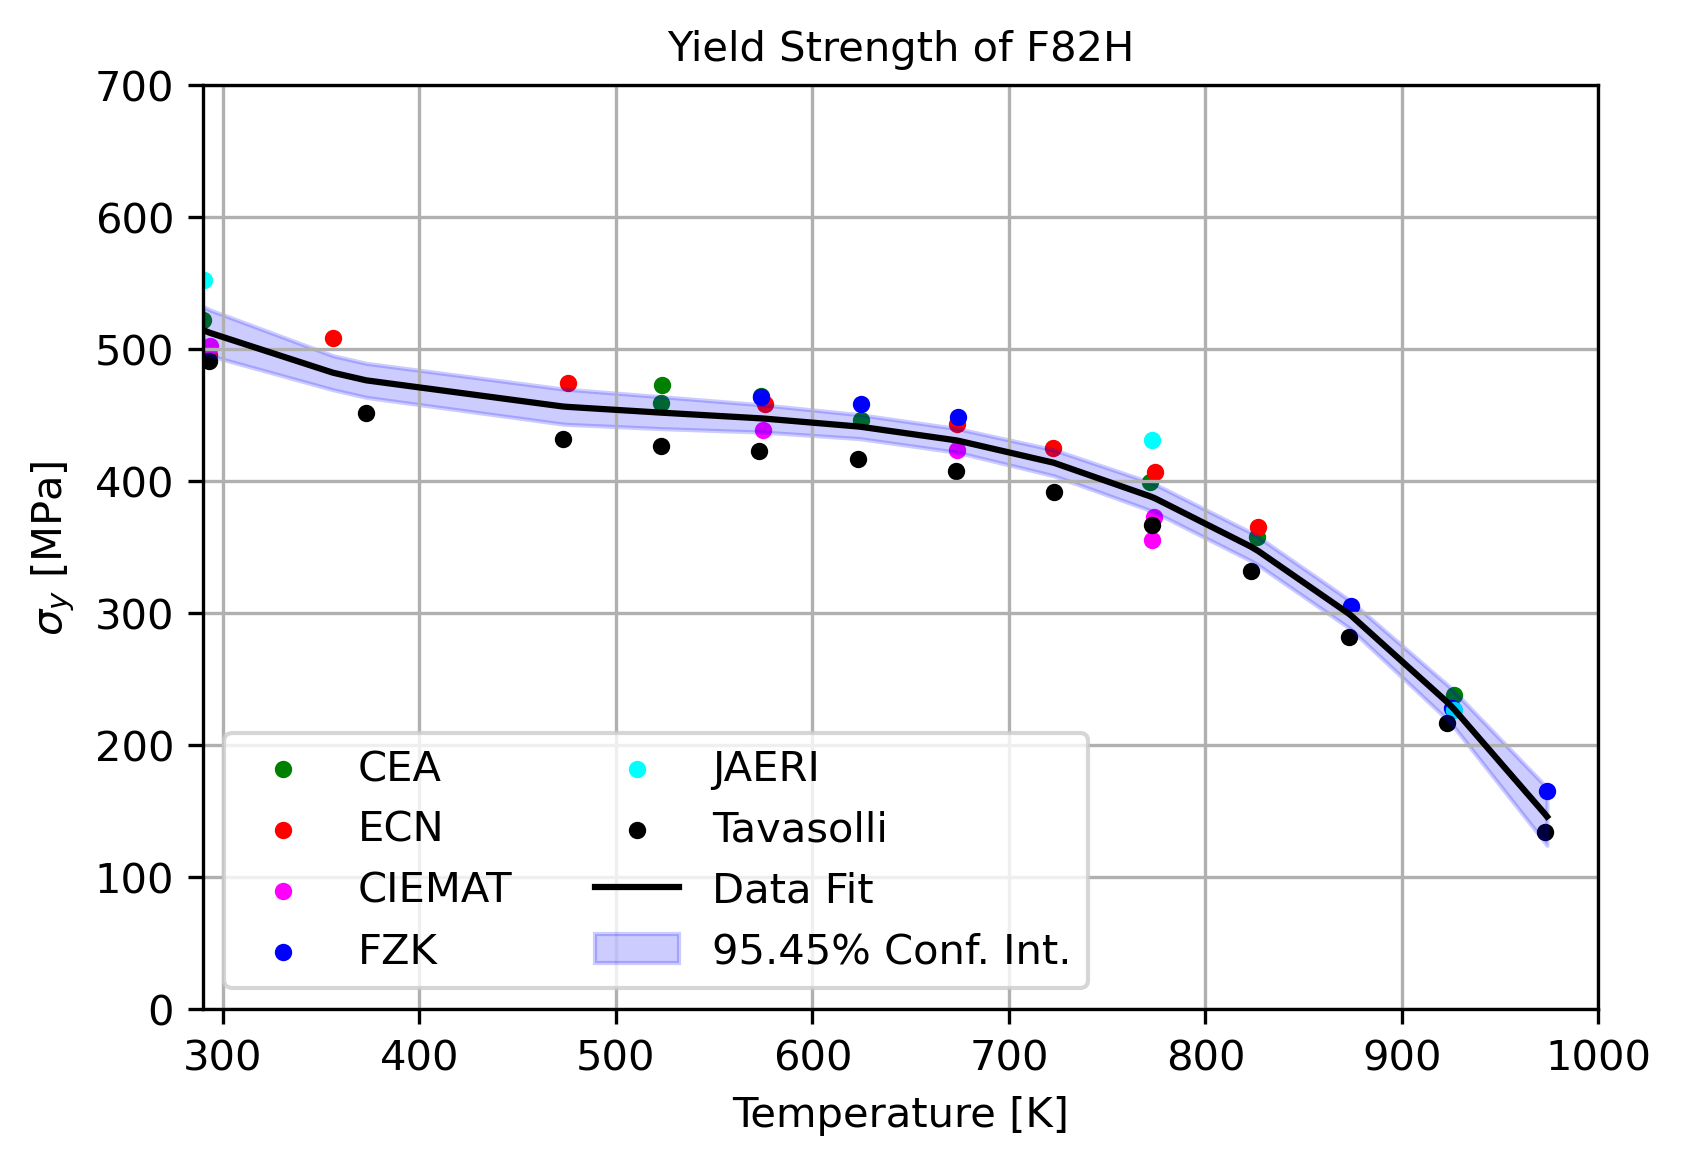

In [2]:
# Load excel data for desired property name
material_property = "Yield Strength"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
T_y, s_y = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ky = T_y + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK', 'JAERI', 'Tavasolli']

fit_result = get_model_fit_and_print_it(T_Ky, s_y, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1},\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\sigma_y$ [MPa]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 700], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T_Ky, s_y, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

### 2.2. Ultimate Strength <a name="ultimate-strength"></a>

,T_CEA_uC,CEA_uMPa,T_ECN_uC,ECN_uMPa,T_CIEMAT_uC,CIEMAT_uMPa,T_FZK_JAERI_uC,FZK_JAERI_uMPa,T_TavassoliC,Tavassoli_uMPa
0,19.883690,636.194176,19.470673,625.930739,19.406076,613.075124,19.880718,656.808534,20,610
1,249.640933,529.611105,78.130252,608.814784,300.066745,498.784337,299.029337,516.301493,100,563
2,347.345292,499.317541,200.207251,554.298958,398.914934,467.483729,350.526986,490.576763,200,526
3,450.202342,442.119312,300.266598,514.904718,498.825122,390.710939,448.231257,440.433398,250,512
4,498.856082,412.865264,401.332095,492.921867,499.826334,371.288641,497.701877,459.330458,300,499
5,550.819140,353.491450,450.614773,456.902542,NaN,NaN,548.920888,347.005279,350,484
6,648.315147,214.193752,499.873757,431.036836,NaN,NaN,600.499369,286.641322,400,467
7,700.297656,146.484503,549.202130,375.435528,NaN,NaN,700.801548,153.242484,450,444
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,414
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,377


**Fitting parameters for F82H Ultimate Strength** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 42
    # variables        = 4
    chi-square         = 13059.6480
    reduced chi-square = 343.674948
    Akaike info crit   = 249.063739
    Bayesian info crit = 256.014417
    R-squared          = 0.98034823
[[Variables]]
    a: -2.5722e-06 +/- 3.9363e-07 (15.30%) (init = 1)
    b:  0.00408174 +/- 7.4835e-04 (18.33%) (init = 1)
    c: -2.46487542 +/- 0.44458965 (18.04%) (init = 1)
    d:  1064.80116 +/- 80.5496076 (7.56%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9959
    C(b, c) = -0.9946
    C(c, d) = -0.9906
    C(a, c) = +0.9814
    C(b, d) = +0.9726
    C(a, d) = -0.9504


**The equation for F82H Ultimate Strength is:**


-2.57216e-6*T**3 + 0.00408174*T**2 - 2.46488*T + 1064.8

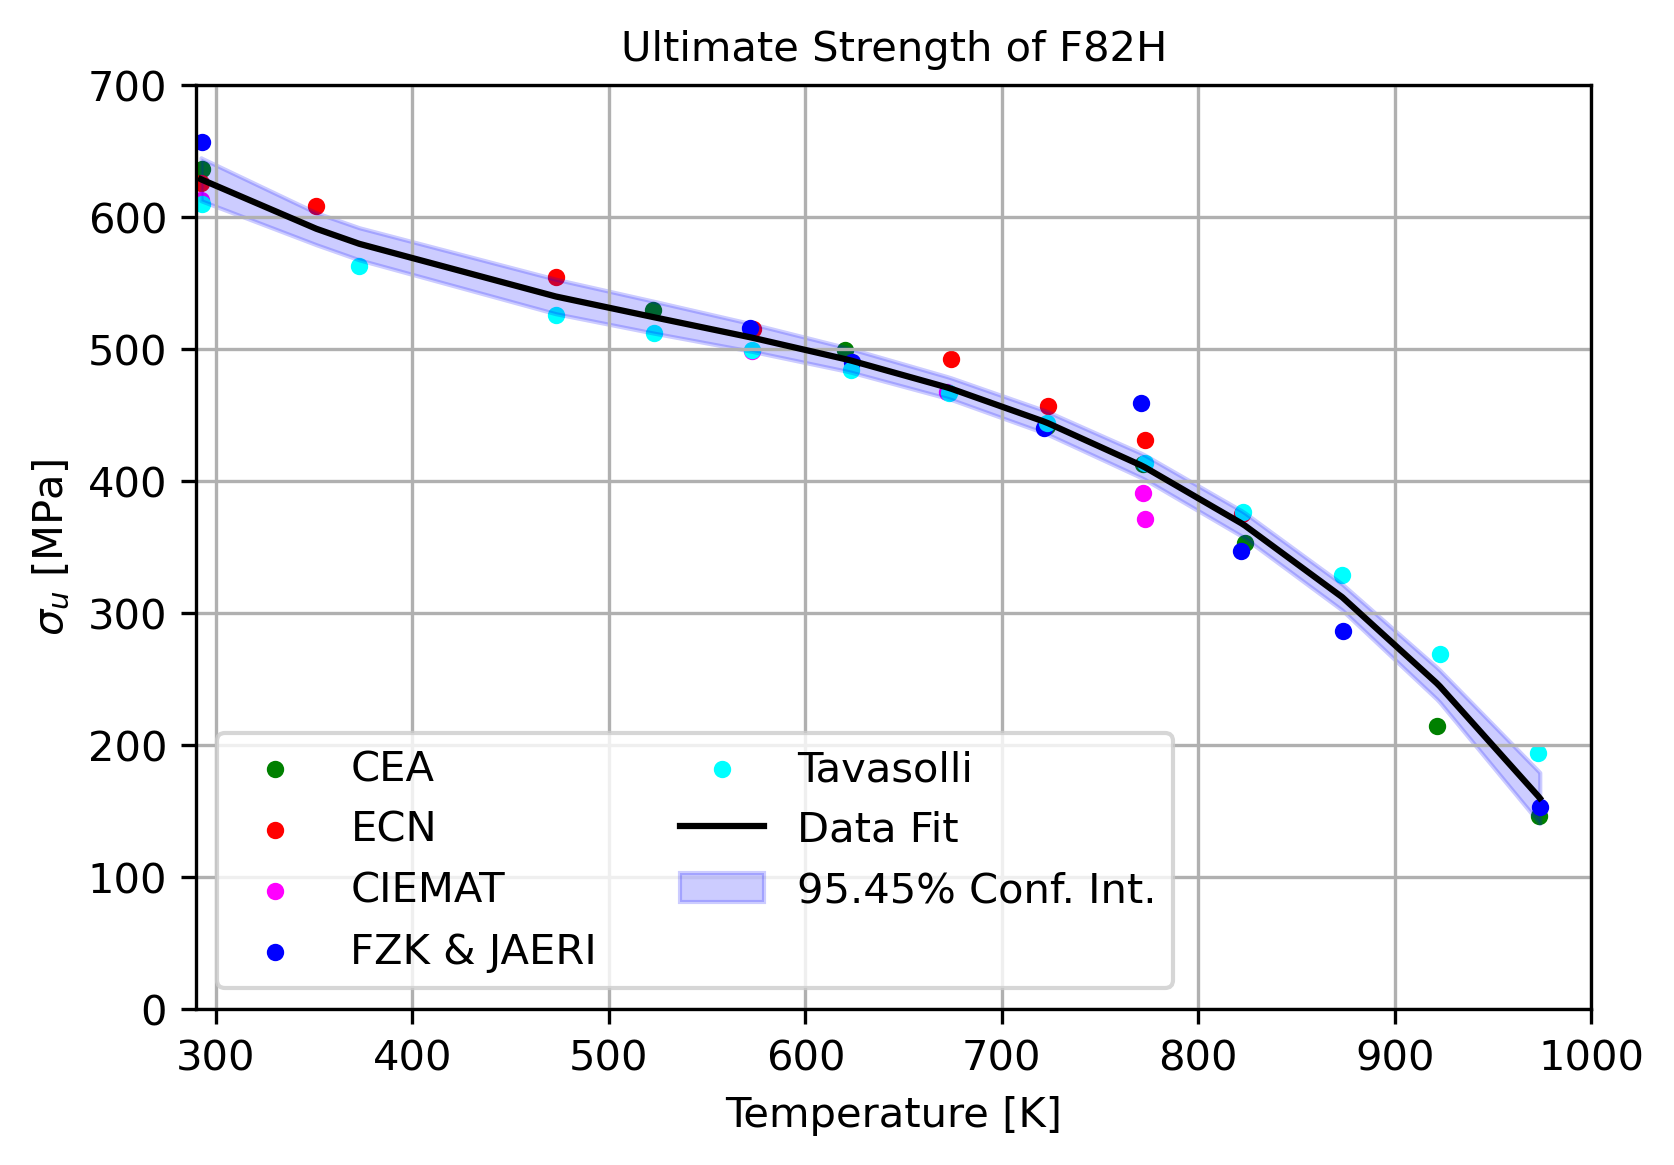

In [3]:
# Load excel data for desired property name
material_property = "Ultimate Strength"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
T_u, s_u = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ku = T_u + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK & JAERI', 'Tavasolli']

fit_result = get_model_fit_and_print_it(T_Ku, s_u, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1},\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\sigma_u$ [MPa]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 700], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T_Ku, s_u, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

### 2.3. Uniform Elongation <a name="uniform-elongation"></a>

,T_CEA_uC,CEA_u,T_ECN_uC,ECN_u,T_CIEMAT_uC,CIEMAT_u,T_FZK_uC,FZK_u
0,19.114276,5.481020,18.295773,6.050780,20.607695,5.914908,19.396072,5.225153
1,17.863262,5.208505,78.867511,4.878994,300.073592,2.943780,249.055206,3.115027
2,250.537218,3.415612,199.312262,3.718388,299.655736,2.244383,300.892090,2.597541
3,347.189041,2.871911,298.105183,3.117848,399.453035,2.629894,601.252052,0.528846
4,349.183998,2.401259,400.176484,2.206043,397.898323,2.767781,698.752306,1.582707
5,399.344727,2.847838,451.472057,1.822783,499.966680,1.498425,649.140811,1.201503
6,450.332806,1.931936,500.584838,1.626278,500.542404,1.025605,350.658422,1.829034
7,499.998141,1.276128,550.278953,1.118473,NaN,NaN,18.923952,5.605686
8,552.213880,0.806149,NaN,NaN,NaN,NaN,NaN,NaN
9,650.056665,0.980869,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Uniform Elongation** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 34
    # variables        = 4
    chi-square         = 4.33192343
    reduced chi-square = 0.14439745
    Akaike info crit   = -62.0518616
    Bayesian info crit = -55.9464195
    R-squared          = 0.95087664
[[Variables]]
    a:  1.2824e-08 +/- 1.0378e-08 (80.93%) (init = 1)
    b: -1.6486e-05 +/- 1.9244e-05 (116.73%) (init = 1)
    c: -0.00260194 +/- 0.01107030 (425.46%) (init = 1)
    d:  7.39335901 +/- 1.92056654 (25.98%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9968
    C(b, c) = -0.9959
    C(c, d) = -0.9928
    C(a, c) = +0.9859
    C(b, d) = +0.9791
    C(a, d) = -0.9624


**The equation for F82H Uniform Elongation is:**


1.28237e-8*T**3 - 1.64863e-5*T**2 - 0.00260194*T + 7.39336

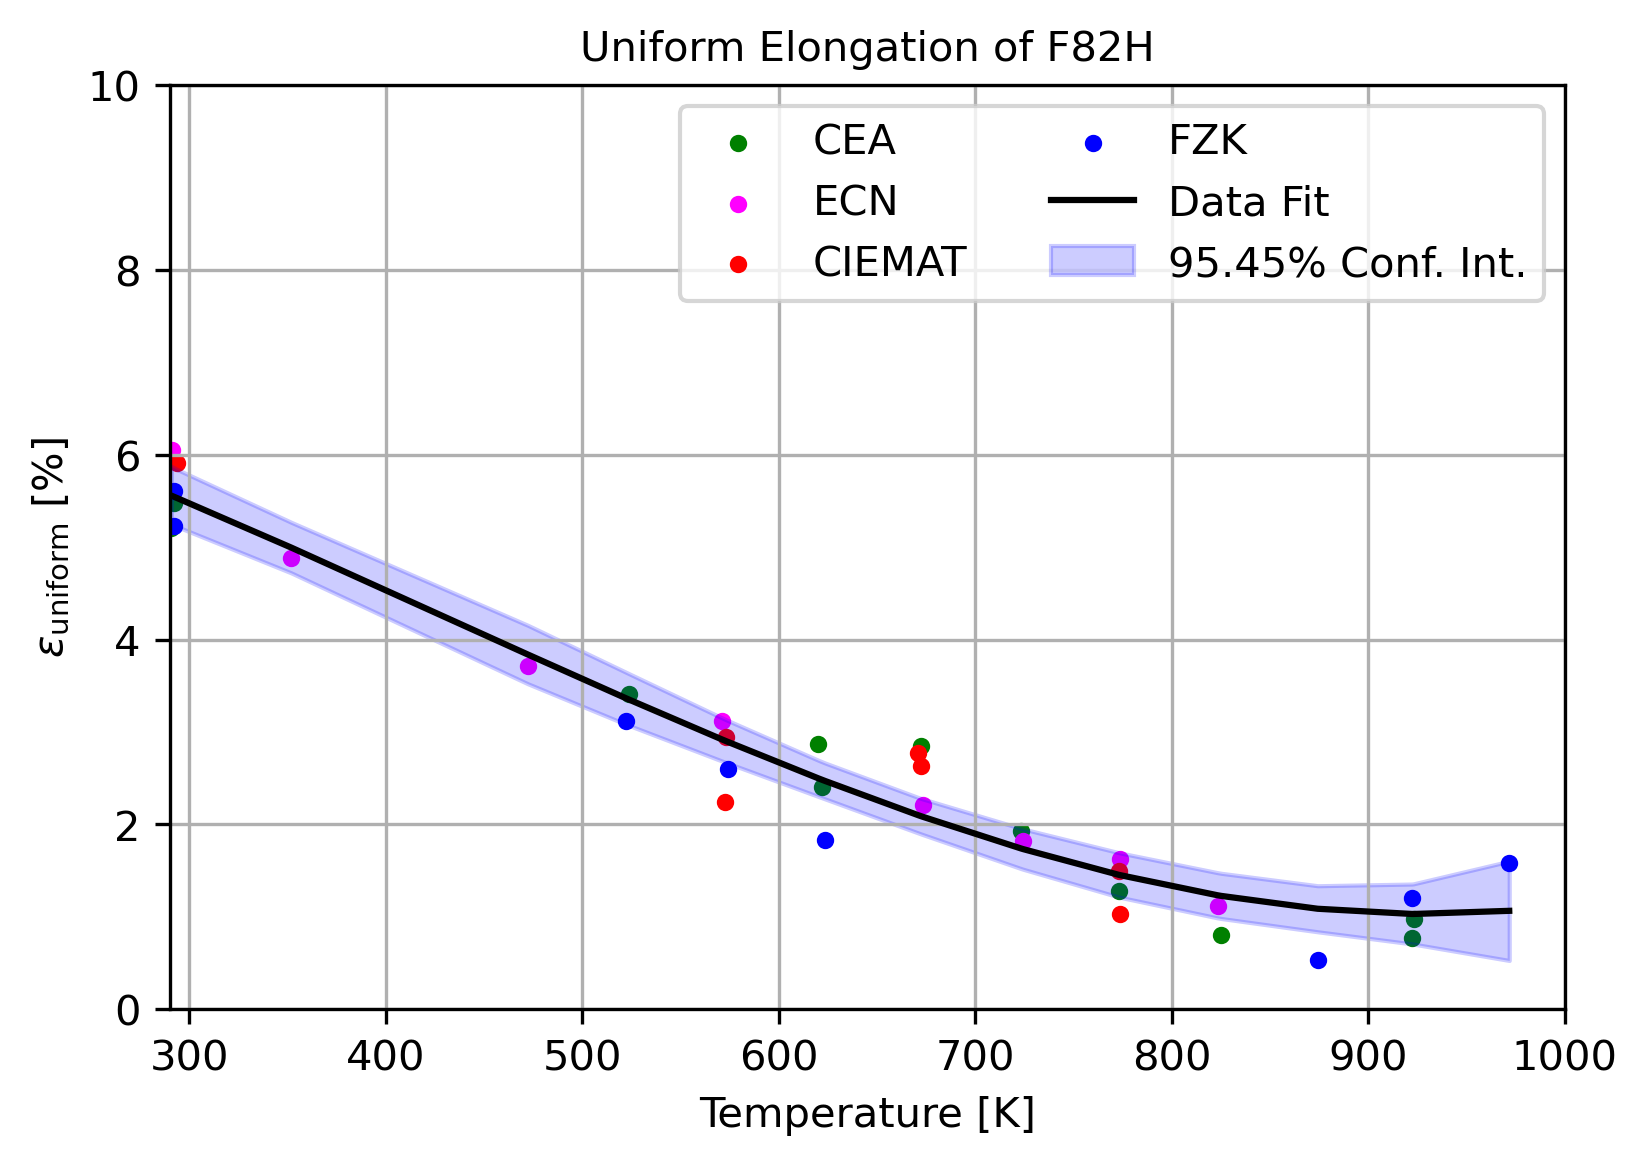

In [4]:
# Load excel data for desired property name
material_property = "Uniform Elongation"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
T_y, s_y = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ky = T_y + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'magenta', 'red', 'blue']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK']
legend_loc = 'upper right'

fit_result = get_model_fit_and_print_it(T_Ky, s_y, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1},\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\epsilon_\text{uniform}$ [%]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 10], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=2)

plot_fit_and_conf(T_Ky, s_y, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

### 2.4. Total Elongation <a name="total-elongation"></a>

,T_CEA_tC,CEA_t,T_ECN_tC,ECN_t,T_CIEMAT_tC,CIEMAT_t,T_FZK_tC,FZK_t,T_JAERI_tC,JAERI_t
0,18.687006,15.220612,17.516061,18.656908,16.638694,23.655059,18.010233,15.136548,16.984994,21.169447
1,17.595380,11.840886,77.909969,15.138426,301.641720,15.639512,400.284656,8.632500,19.083341,19.959147
2,252.221338,8.478699,197.765601,13.334048,302.244766,7.657476,597.740209,25.683929,20.866522,16.279494
3,249.170094,7.265266,301.589956,10.544117,302.906292,6.400074,698.050192,24.019075,497.611347,21.544136
4,349.752750,7.142764,399.348428,9.877881,399.720866,14.717389,NaN,NaN,NaN,NaN
5,399.616370,6.799844,449.801045,10.037060,400.514567,11.710500,NaN,NaN,NaN,NaN
6,448.244849,10.919695,501.217775,11.646948,498.987414,20.574656,NaN,NaN,NaN,NaN
7,449.319589,8.580022,549.421205,13.152979,498.123496,24.510961,NaN,NaN,NaN,NaN
8,499.203368,13.913173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,500.232280,12.180098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Total Elongation** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 37
    # variables        = 4
    chi-square         = 502.957654
    reduced chi-square = 15.2411410
    Akaike info crit   = 104.554758
    Bayesian info crit = 110.998430
    R-squared          = 0.56752698
[[Variables]]
    a: -1.0815e-07 +/- 1.0249e-07 (94.76%) (init = 1)
    b:  3.0322e-04 +/- 1.8982e-04 (62.60%) (init = 1)
    c: -0.23063109 +/- 0.10917881 (47.34%) (init = 1)
    d:  62.0864929 +/- 18.8055342 (30.29%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9964
    C(b, c) = -0.9959
    C(c, d) = -0.9937
    C(a, c) = +0.9851
    C(b, d) = +0.9809
    C(a, d) = -0.9635


**The equation for F82H Total Elongation is:**


-1.08154e-7*T**3 + 0.00030322*T**2 - 0.230631*T + 62.0865

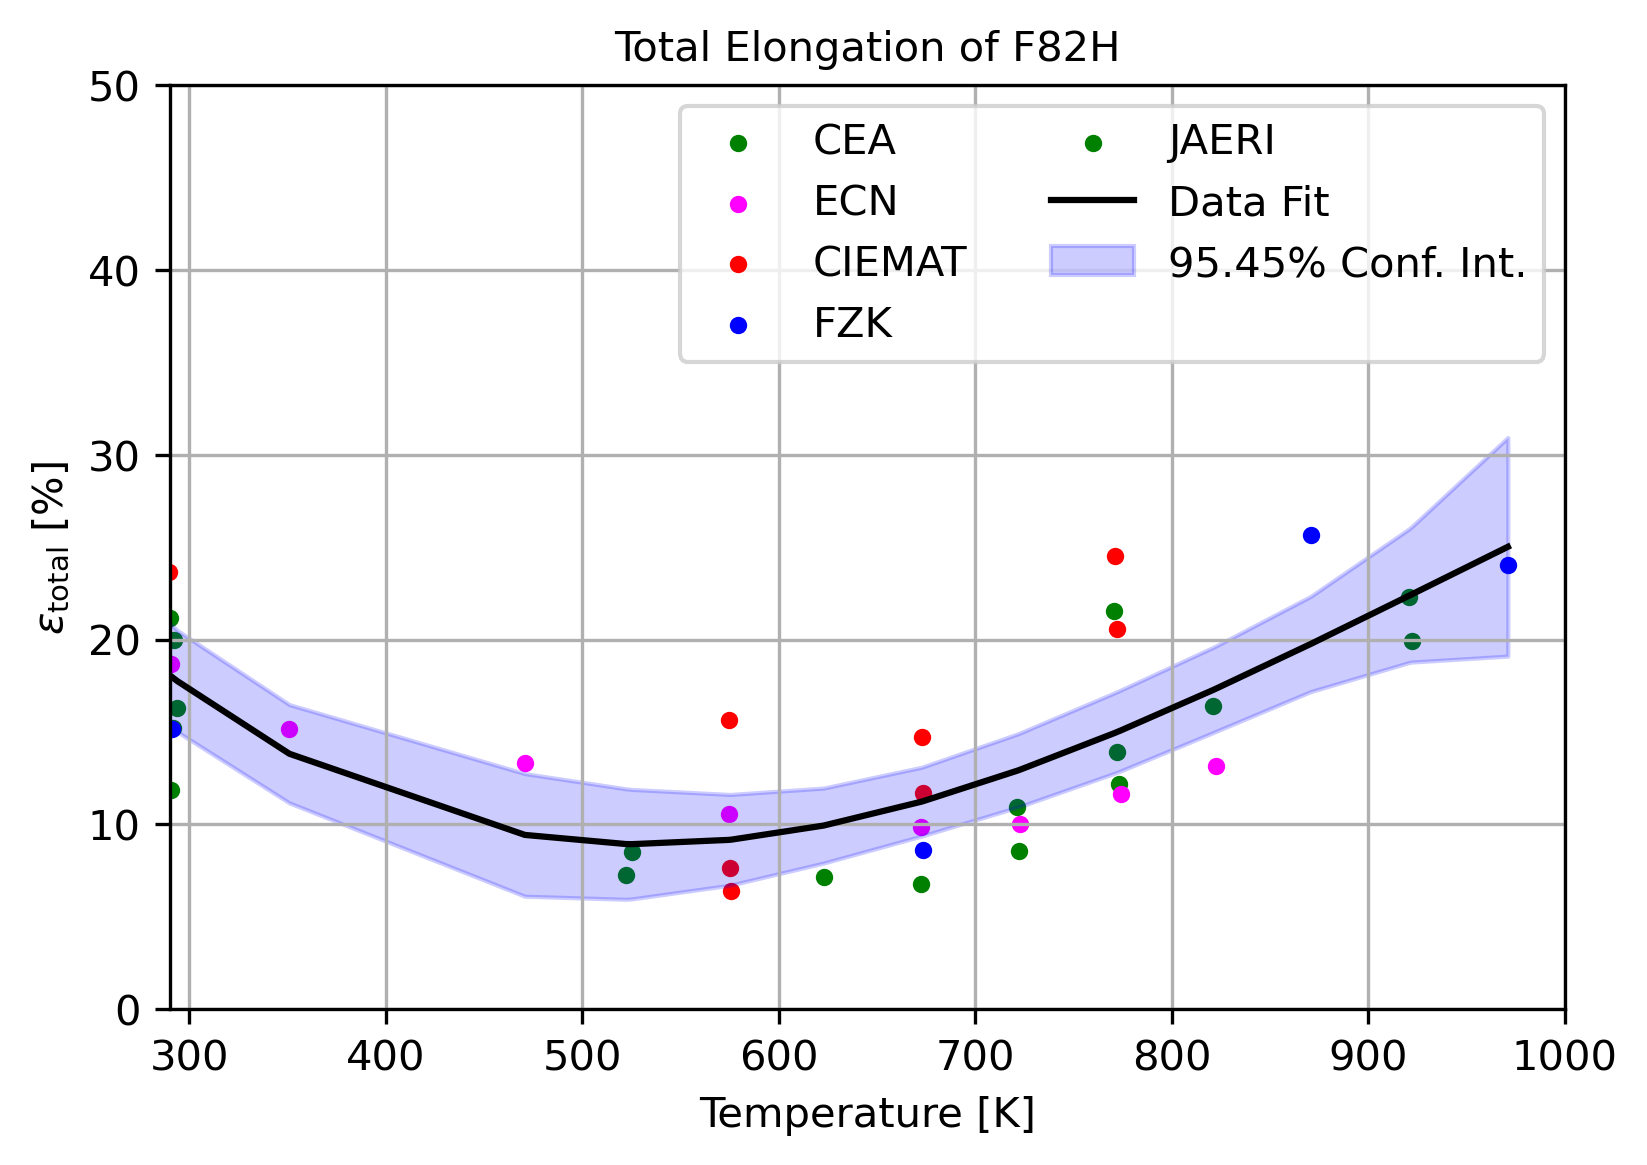

In [5]:
# Load excel data for desired property name
material_property = "Total Elongation"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Concatenate and sort data for fitting
vars_x = variables[::2]
vars_y = variables[1::2]
T_y, s_y = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ky = T_y + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'magenta', 'red', 'blue', 'green']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK', 'JAERI']
legend_loc = 'upper right'

fit_result = get_model_fit_and_print_it(T_Ky, s_y, fit_func='poly', fit_fun_args_and_initials={'a':1, 'b':1, 'c':1, 'd':1},\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\epsilon_\text{total}$ [%]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 50], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=2)

plot_fit_and_conf(T_Ky, s_y, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

### 2.5. Creep <a name="creep"></a>

,Time_HT9s66T873h,Strain_HT9s66T873,Time_HT9s53T873h,Strain_HT9s53T873,Time_HT9s39T873h,Strain_HT9s39T873,Time_HT9s26T873h,Strain_HT9s26T873
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,61.048565,0.185523,84.300643,0.127654,119.930564,0.081212,567.044213,0.069551
2,190.558800,0.218694,270.655039,0.154065,1062.296261,0.144600,1116.140599,0.090522
3,497.186888,0.268442,589.886000,0.212399,5132.590641,0.206887,5044.865597,0.147096
4,909.862070,0.340627,1083.368334,0.227774,7520.581538,0.292159,7505.051219,0.166590
5,4975.448677,0.514988,5151.369792,0.348565,9663.638215,0.310601,9546.812816,0.209773
6,7445.908938,0.599692,7552.471299,0.402324,13754.201137,0.386425,13726.554211,0.254514
7,9502.628340,0.671743,9659.927663,0.459410,NaN,NaN,NaN,NaN
8,NaN,NaN,13728.145943,0.568089,NaN,NaN,NaN,NaN


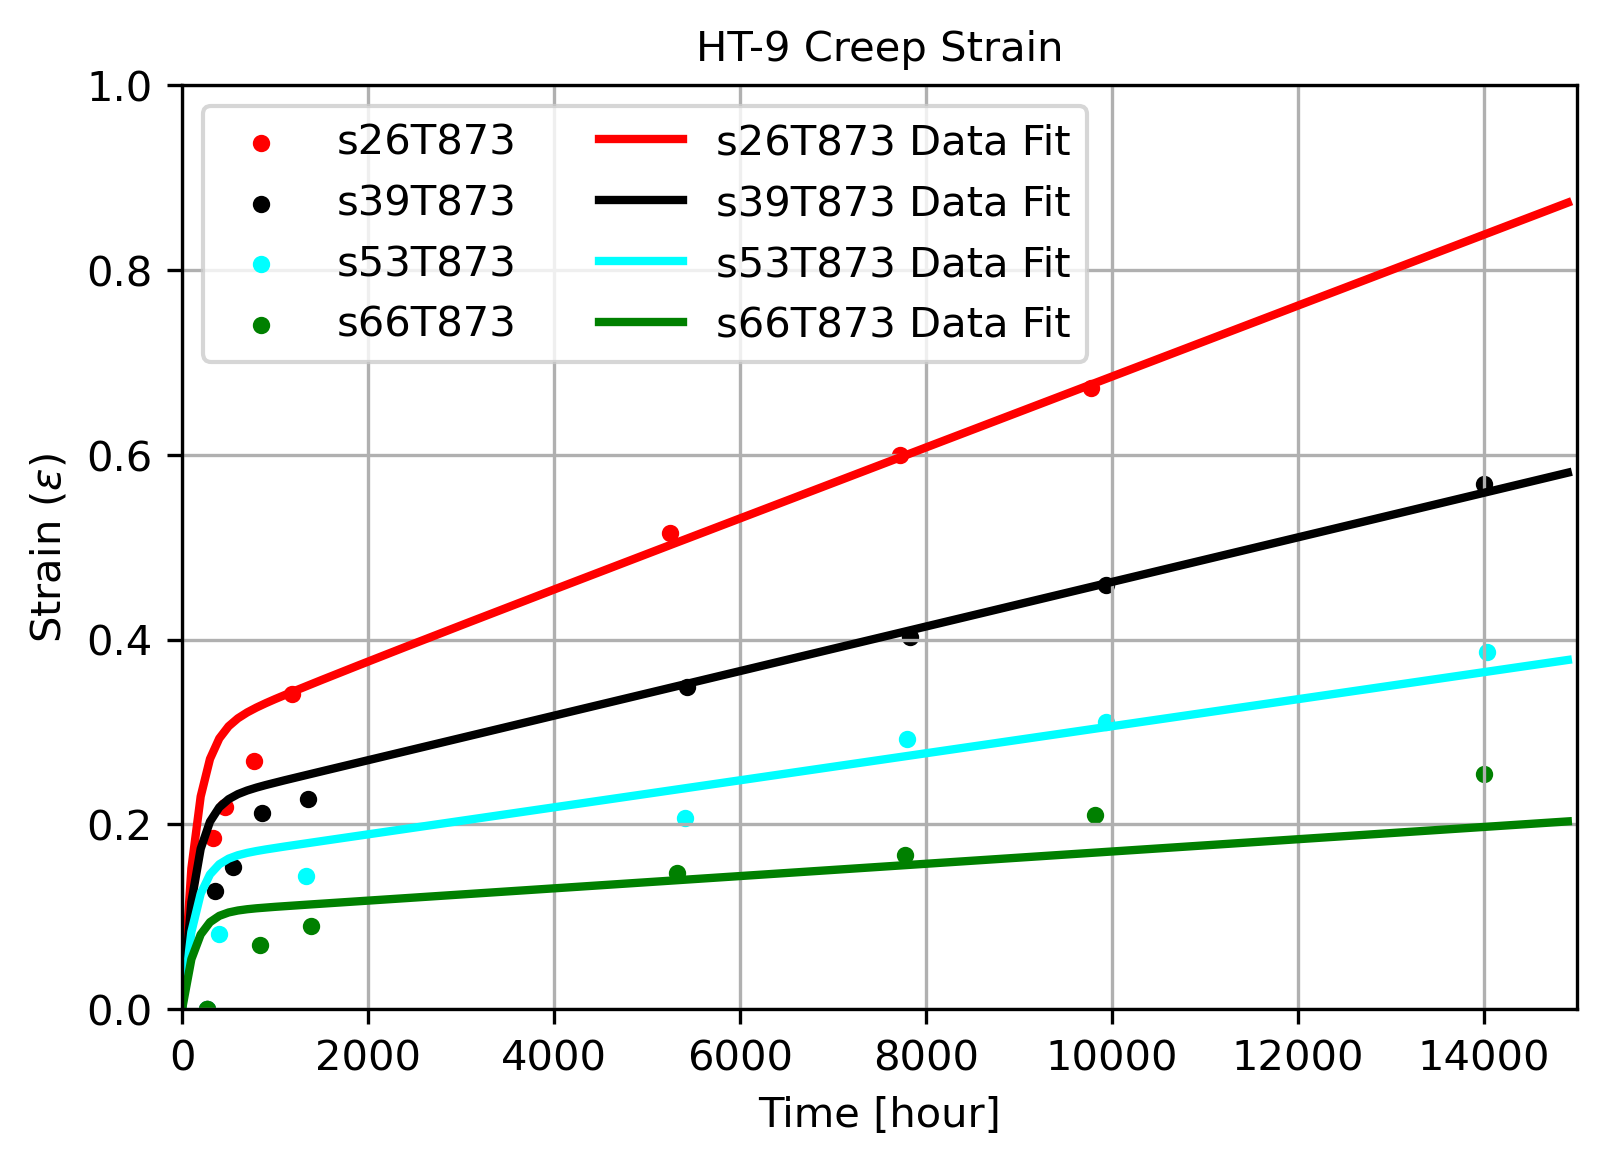

In [6]:
# Load excel data for desired property name
material_property = "HT-9 Creep Strain"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=20, room_temp=293, display_data_table_bool = True)

# Initialize fitting constants and functions
t = 3600 * np.arange(0, 15000, 100)
t_h = t / 3600
n_size = t.size
e1 = np.zeros(n_size)
e2 = np.zeros(n_size)
e3 = np.zeros(n_size)
e4 = np.zeros(n_size)

# Create custom fits
P_0 = lambda T: 0.5 - 2600 / T
P_1 = lambda T: 1 + 50 / T
e_p = lambda s, T: 10**(P_0(T) + P_1(T) * np.log10(s))
m = 2e-6
s0 = lambda s: 0.025 * s + 0.0055 * s**2
S_l = lambda T: -5.7 - 5562.28 / T
e_s = lambda s, T: 10**(S_l(T) + 2.5 * np.log10(s - s0(s)))
eps = lambda s, T, t: e_p(s, T) * (1 - np.exp(-m * t)) + e_s(s, T) * t
t_R = 10**7 * 3600

for i in range(n_size):
    e1[i] = eps(26, 873, t[i])
    e2[i] = eps(39, 873, t[i])
    e3[i] = eps(53, 873, t[i])
    e4[i] = eps(66 / (1 - (t[i] / t_R)**(1 / 3.5)), 873, t[i])

# Assemble raw and fit data
vars_x = variables[::2]
vars_y = variables[1::2]
x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
x_fit_list = [t_h, t_h, t_h, t_h]
y_fit_list = [e4, e3, e2, e1]
data_colors = ['red', 'black', 'cyan', 'green']
fit_colors = data_colors
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['s26T873', 's39T873', 's53T873', 's66T873']
fit_labels = ['s26T873 Data Fit', 's39T873 Data Fit', 's53T873 Data Fit', 's66T873 Data Fit']
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Strain ($\epsilon$)', title=material_property,\
                  scale='linear', font_size=fsize, xlim=[0, 15000], ylim=[0, 1],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

,log10timeh_T91s100T873,log10strainrate_T91s100T873,log10timeh_T91s125T873,log10strainrate_T91s125T873,log10timeh_T91s150T873,log10strainrate_T91s150T873,log10timeh_T91s200T873,log10strainrate_T91s200T873,log10timeh_T91s225T873,log10strainrate_T91s225T873,log10timeh_T91s250T873,log10strainrate_T91s250T873,log10timeh_T91s100T923,log10strainrate_T91s100T923,log10timeh_T91s100T973,log10strainrate_T91s100T973
0,-2.013622,-5.359214,-1.968025,-5.145993,-1.949434,-4.992927,-1.962097,-4.948188,-1.974567,-4.688262,-1.992587,-4.393764,-1.904585,-5.315931,-1.963356,-4.679565
1,-1.921972,-5.402657,-1.860381,-5.273445,-1.848490,-5.081457,-1.843766,-5.104594,-1.745782,-4.969743,-1.920837,-4.456413,-1.798205,-5.445333,-1.861200,-4.772121
2,-1.833978,-5.503227,-1.729096,-5.415692,-1.741248,-5.187583,-1.730333,-5.219809,-1.527142,-4.971481,-1.810779,-4.510499,-1.688025,-5.517806,-1.724217,-4.899891
3,-1.711856,-5.532574,-1.537408,-5.611979,-1.656112,-5.299382,-1.644020,-5.302801,-1.397036,-5.011090,-1.753458,-4.643982,-1.566447,-5.640260,-1.640635,-4.987884
4,-1.604557,-5.718993,-1.427113,-5.715107,-1.523714,-5.510981,-1.552767,-5.381259,-1.319024,-5.088858,-1.624268,-4.715956,-1.479063,-5.762323,-1.575626,-5.032145
5,-1.516504,-5.840995,-1.303685,-5.828077,-1.331253,-5.641178,-1.409722,-5.505855,-1.189019,-5.234545,-1.605153,-4.751582,-1.391679,-5.834536,-1.485078,-5.102810
6,-1.439932,-5.948637,-1.201270,-5.926273,-1.208276,-5.800066,-1.244402,-5.566612,-1.058857,-5.216292,-1.509406,-4.752343,-1.308094,-5.892463,-1.410783,-5.142826
7,-1.344390,-6.020680,-1.106787,-6.073097,-1.075800,-5.929786,-1.155612,-5.640478,-0.965200,-5.265255,-1.428064,-4.797332,-1.232108,-6.021518,-1.327200,-5.182947
8,-1.305976,-6.120937,-0.928195,-6.220589,-0.943307,-6.041962,-1.029802,-5.719211,-0.876740,-5.304532,-1.332368,-4.851304,-1.156122,-6.065114,-1.227365,-5.218902
9,-1.206619,-6.193004,-0.786438,-6.406741,-0.823471,-6.183279,-0.899073,-5.816274,-0.653023,-5.441320,-1.222395,-4.994074,-1.049741,-6.144666,-1.136818,-5.311326


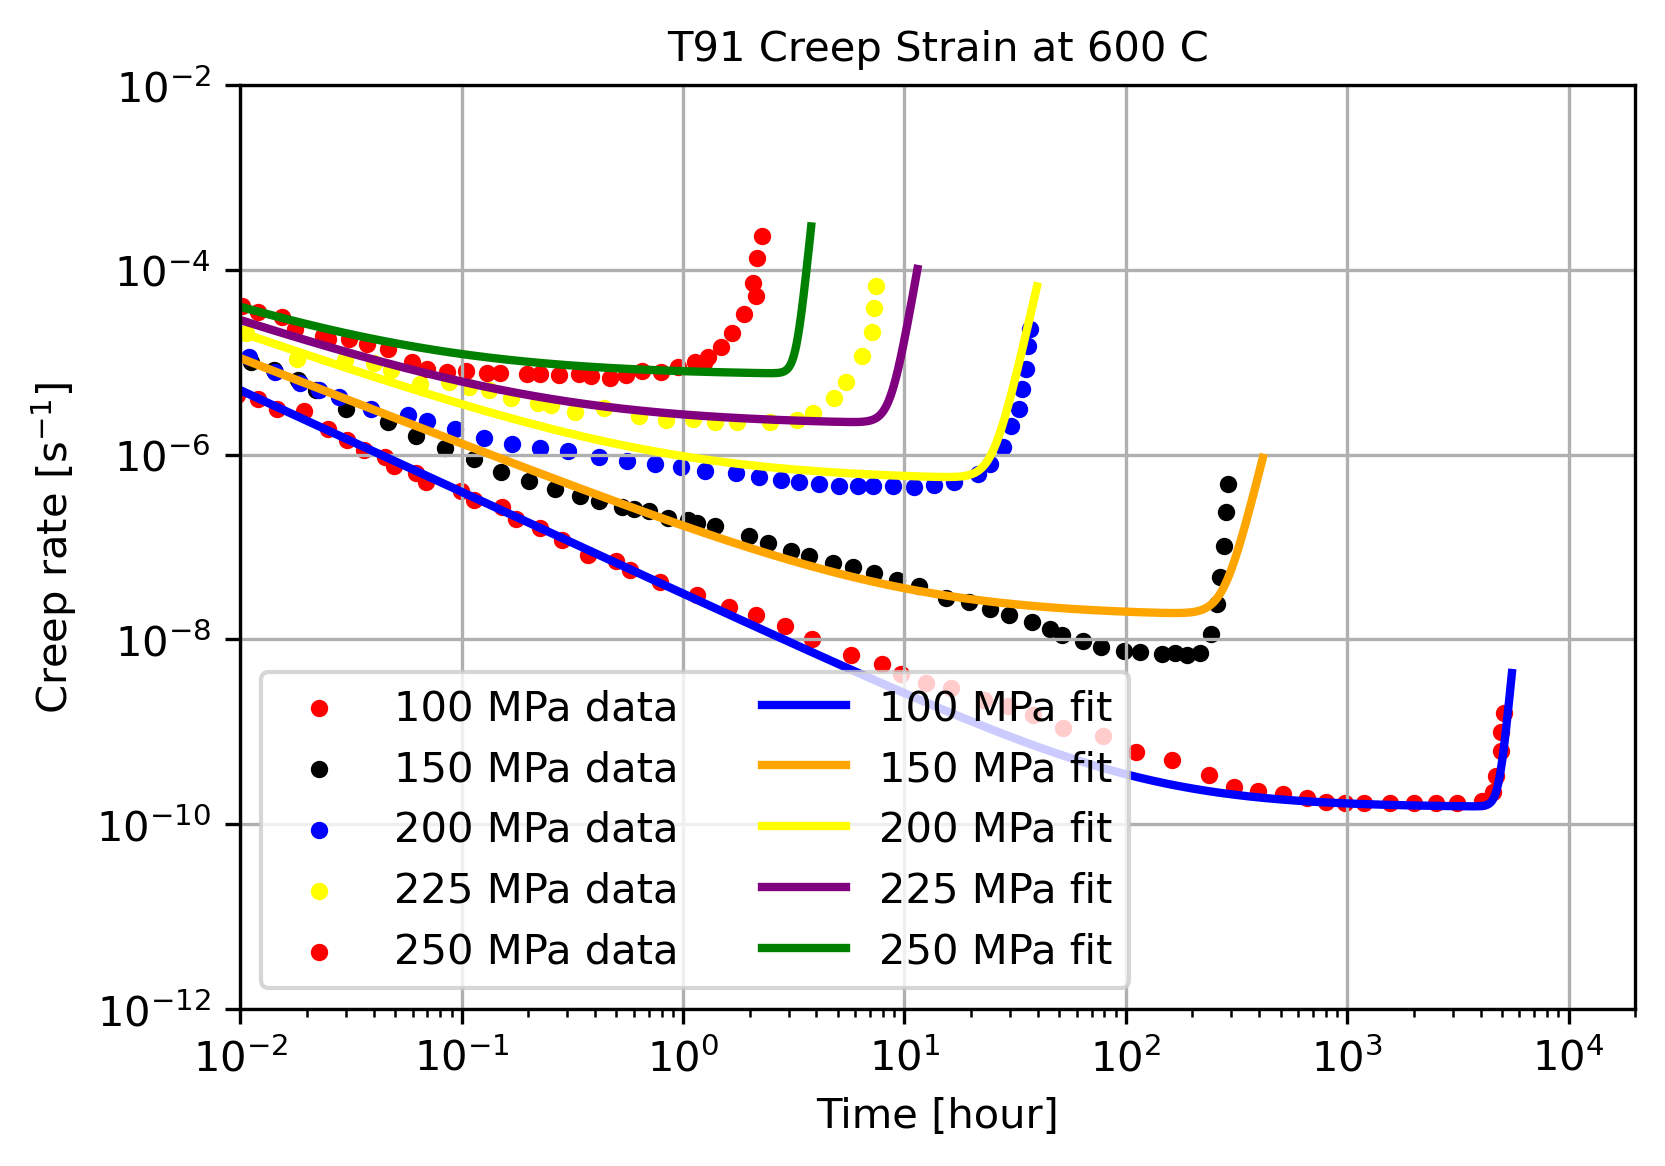

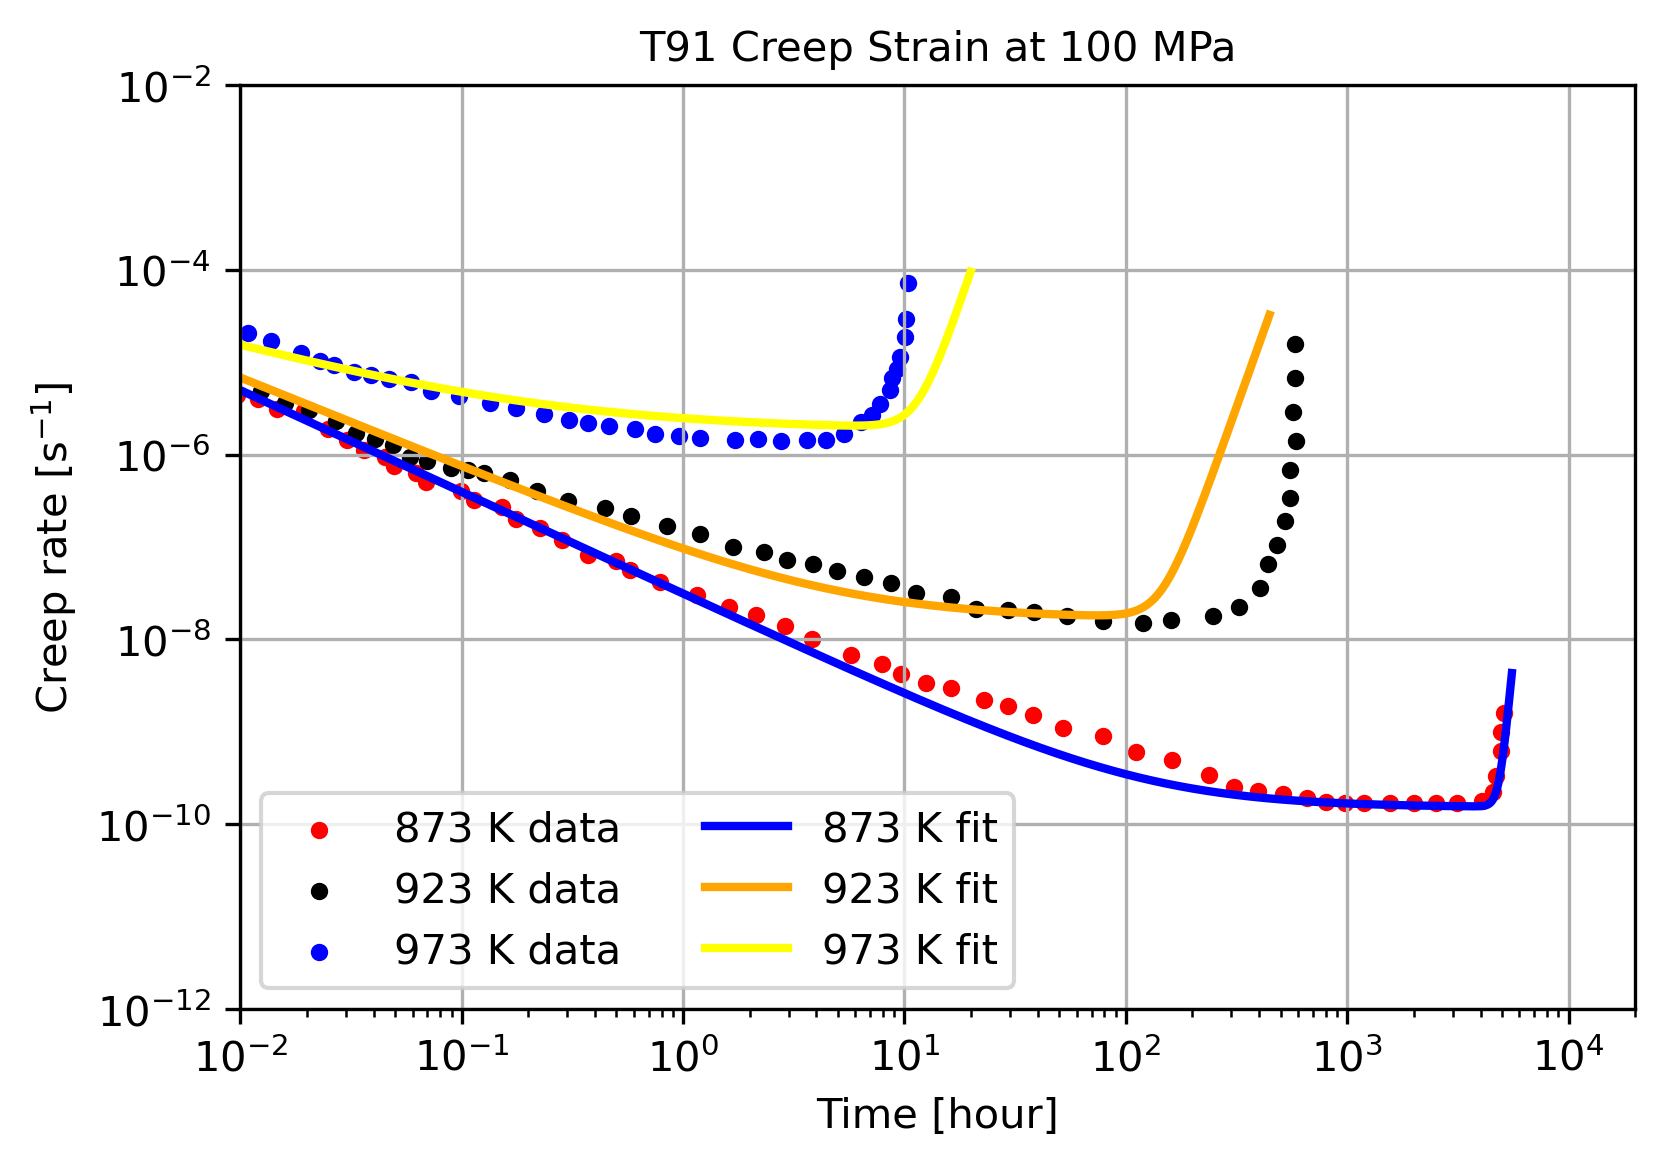

In [7]:
# Load excel data for desired property name
material_property = "T91 Creep Strain"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=65, room_temp=293, display_data_table_bool = True)

# Initialize fitting constants and functions
i_max = 10000
t_max = 10000

A_p = -0.02193
B_p = -0.02796
C_p = 28.7

A_r = -0.021
B_r = -0.0231
C_r = 26.1

A_e = -68.97
B_e = 11.75
C_e = 0.04084

gamma_0 = 1.04
gamma_1 = 4e-3
gamma_2 = 2e-3
a_0 = -4.2
b_0 = 3.5e-3
c_0 = 1e-6

def get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10**Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        
        x[i] = -2 + (i - 1) * del_x
        time[i] = 10**x[i]
    
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10**y_I + 10**y_II + 10**y_III
    
        if x[i] > Lt_r(sig, Temp):
            epsdot[i] = 0

    return time, epsdot

get_epsdot_T91_lambda = lambda sig, Temp:\
    get_epsdot_T91(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

# Assemble raw and fit data for first plot
T91s100T873_endpoint = 0.9575
t_T91s100T873, epsdot_T91s100T873 = get_epsdot_T91_lambda(100, 873)

T91s150T873_endpoint = 0.77
t_T91s150T873, epsdot_T91s150T873 = get_epsdot_T91_lambda(150, 873)

T91s200T873_endpoint = 0.6
t_T91s200T873, epsdot_T91s200T873 = get_epsdot_T91_lambda(200, 873)

T91s225T873_endpoint = 0.51
t_T91s225T873, epsdot_T91s225T873 = get_epsdot_T91_lambda(225, 873)

T91s250T873_endpoint = 0.43
t_T91s250T873, epsdot_T91s250T873 = get_epsdot_T91_lambda(250, 873)

vars_x = variables[::2]
vars_y = variables[1::2]
vars_x = [vars_x[0], vars_x[2], vars_x[3], vars_x[4], vars_x[5]]
vars_y = [vars_y[0], vars_y[2], vars_y[3], vars_y[4], vars_y[5]]
x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]

x_fit_list = [t_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              t_T91s150T873[:int(i_max*T91s150T873_endpoint)],\
              t_T91s200T873[:int(i_max*T91s200T873_endpoint)],\
              t_T91s225T873[:int(i_max*T91s225T873_endpoint)],\
              t_T91s250T873[:int(i_max*T91s250T873_endpoint)]]

y_fit_list = [epsdot_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              epsdot_T91s150T873[:int(i_max*T91s150T873_endpoint)],\
              epsdot_T91s200T873[:int(i_max*T91s200T873_endpoint)],\
              epsdot_T91s225T873[:int(i_max*T91s225T873_endpoint)],\
              epsdot_T91s250T873[:int(i_max*T91s250T873_endpoint)]]
              
data_colors = ['red', 'black', 'blue', 'yellow', 'red']
fit_colors = ['blue', 'orange', 'yellow', 'purple', 'green']

data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['100 MPa data', '150 MPa data', '200 MPa data', '225 MPa data', '250 MPa data']
fit_labels = ['100 MPa fit', '150 MPa fit', '200 MPa fit', '225 MPa fit', '250 MPa fit']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep rate [s$^{-1}$]', title=material_property + " at 600 C",
                  scale='log-log', font_size=fsize, xlim=[1e-2, 2e4], ylim=[1e-12, 1e-2], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)


# Assemble raw and fit data for second plot
T91s100T873_endpoint = 0.9575
t_T91s100T873, epsdot_T91s100T873 = get_epsdot_T91_lambda(100, 873)
T91s100T923_endpoint = 0.775
t_T91s100T923, epsdot_T91s100T923 = get_epsdot_T91_lambda(100, 923)
T91s100T973_endpoint = 0.55
t_T91s100T973, epsdot_T91s100T973 = get_epsdot_T91_lambda(100, 973)

vars_x = variables[::2]
vars_y = variables[1::2]
vars_x = [vars_x[0], vars_x[-2], vars_x[-1]]
vars_y = [vars_y[0], vars_y[-2], vars_y[-1]]
x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]

x_fit_list = [t_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              t_T91s100T923[:int(i_max*T91s100T923_endpoint)],\
              t_T91s100T973[:int(i_max*T91s100T973_endpoint)]]
y_fit_list = [epsdot_T91s100T873[:int(i_max*T91s100T873_endpoint)],\
              epsdot_T91s100T923[:int(i_max*T91s100T923_endpoint)],\
              epsdot_T91s100T973[:int(i_max*T91s100T973_endpoint)]] 
    
data_colors = ['red', 'black', 'blue']
fit_colors = ['blue', 'orange', 'yellow']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['873 K data', '923 K data', '973 K data']
fit_labels = ['873 K fit', '923 K fit', '973 K fit']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep rate [s$^{-1}$]', title=material_property + " at 100 MPa",\
                  scale='log-log', font_size=fsize, xlim=[1e-2, 2e4], ylim=[1e-12, 1e-2],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

C:\Users\indro\AppData\Local\Temp\ipykernel_24152\1044955945.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])


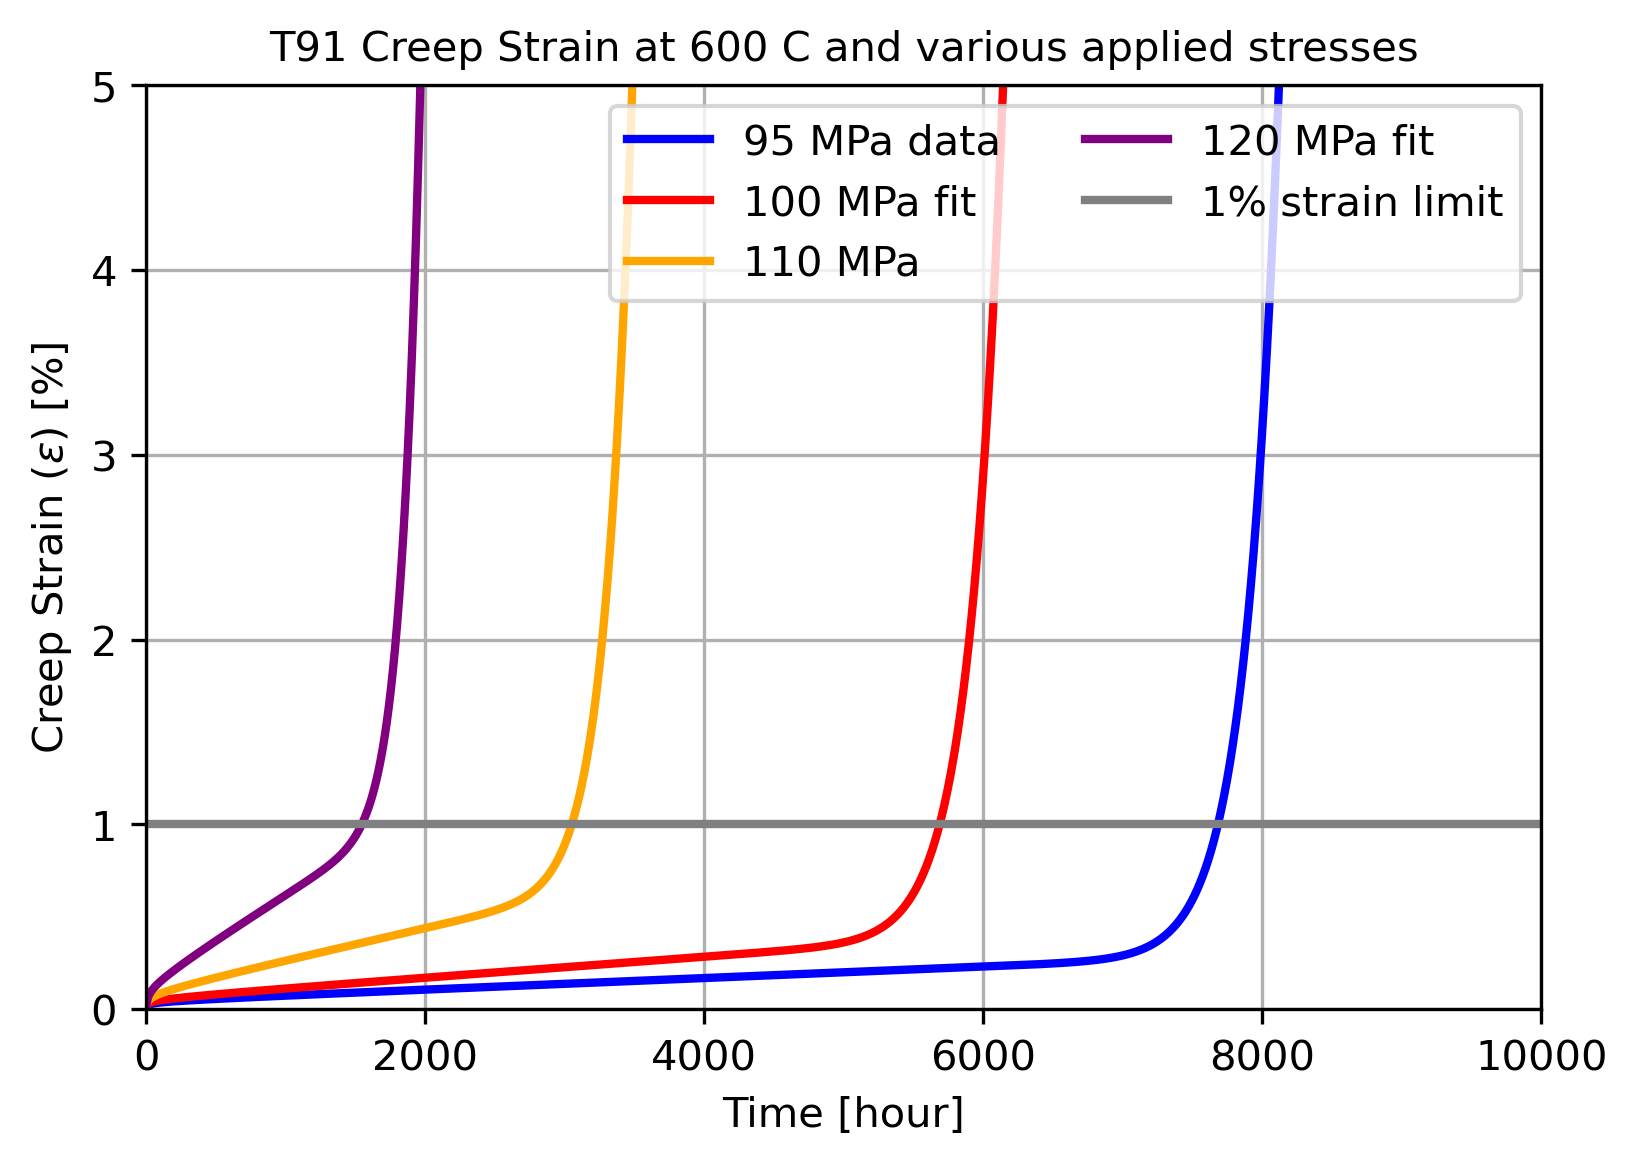

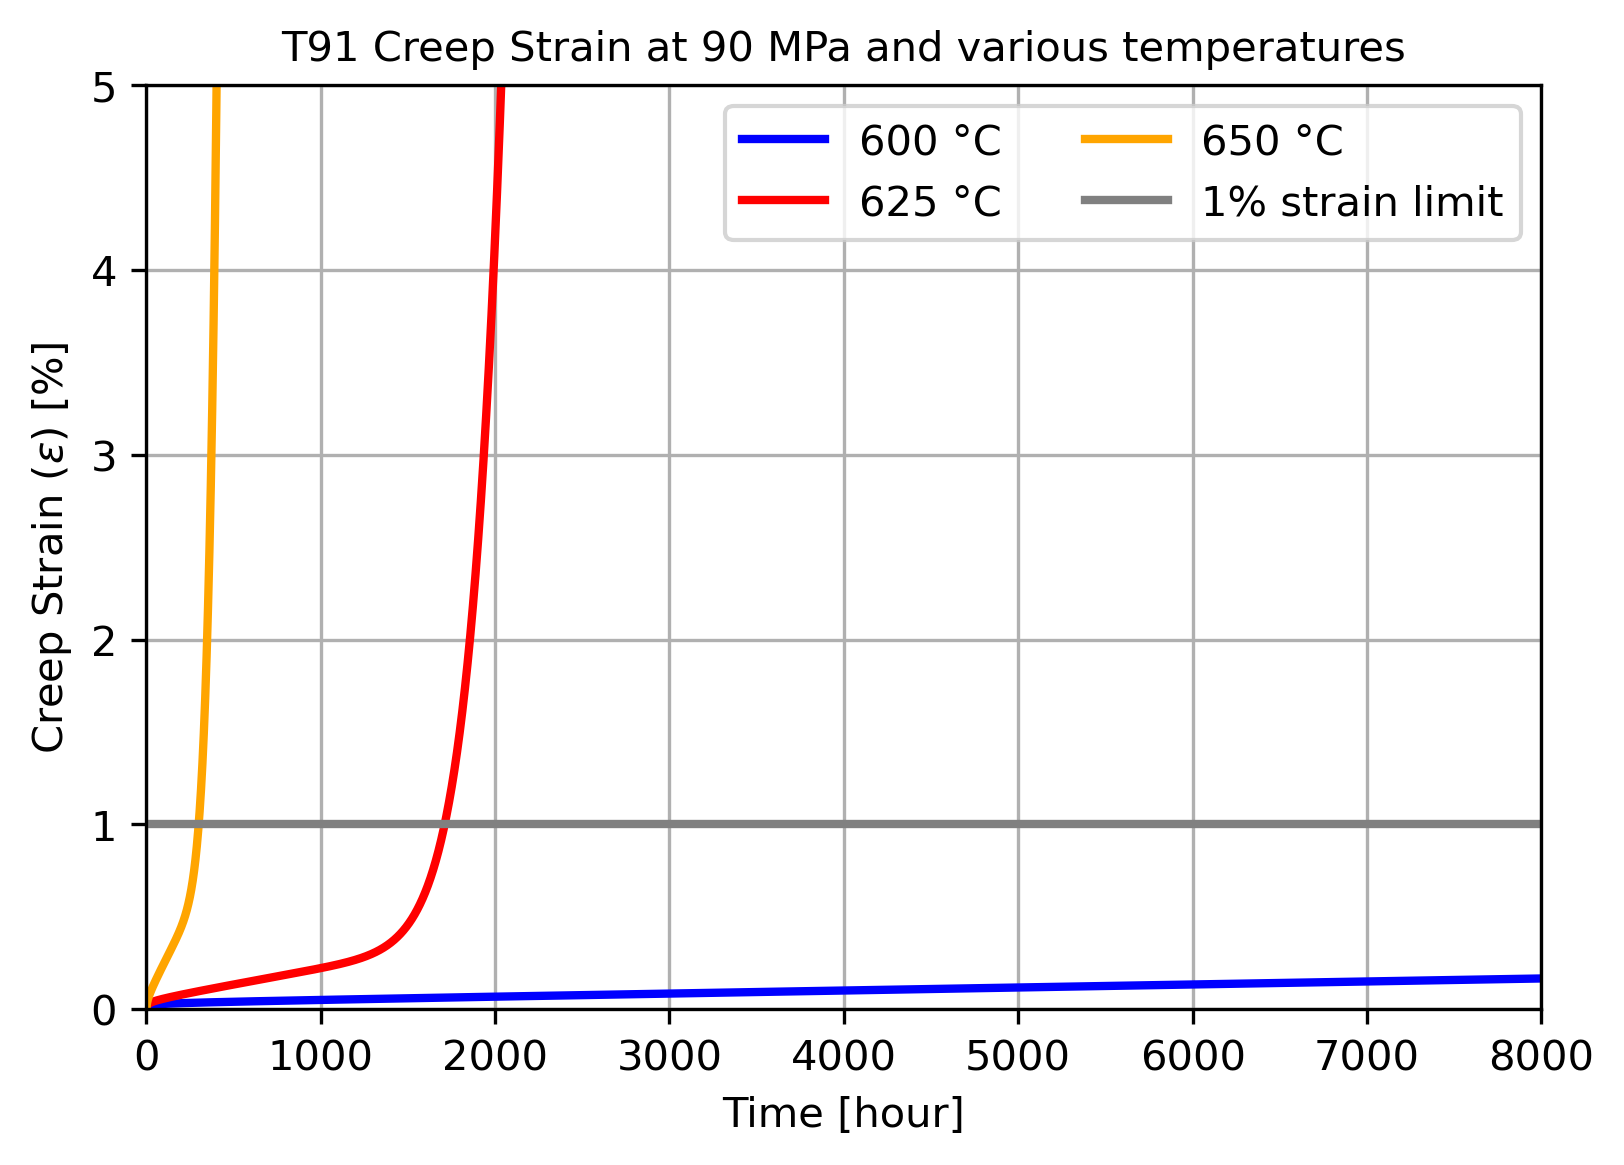

In [8]:
# Initialize fitting constants and functions

def get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0):

    del_x = (np.log10(t_max) - (-2)) / i_max
    del_t = t_max / i_max
    time = np.zeros(i_max)
    epsdot = np.zeros(i_max)
    x = np.zeros(i_max)
    q = np.zeros(i_max)

    Lt_p = lambda s, T: A_p * s + B_p * T + C_p
    Le = lambda s, T: A_e + B_e * np.log10(s) + C_e * T
    Lt_r = lambda s, T: A_r * s + B_r * T + C_r
    gamma = lambda s, T: gamma_0 + gamma_1 * (T - 873) + gamma_2 * (s - 100)
    Lt_s = lambda s, T: Lt_r(s, T) / gamma(s, T)
    Le_r = lambda s, T: -Lt_r(s, T) * 1.6
    Le_0 = lambda s, T: a_0 + b_0 * (s - 100) + c_0 * (T - 873)

    t_r = 10 ** Lt_r(sig, Temp)
    a1 = (Le_0(sig, Temp) - Le(sig, Temp)) / (-3 - Lt_p(sig, Temp))
    b1 = Le_0(sig, Temp) + 3 * a1
    a3 = (Le_r(sig, Temp) - Le(sig, Temp)) / (Lt_r(sig, Temp) - Lt_s(sig, Temp))
    b3 = Le_r(sig, Temp) - a3 * Lt_r(sig, Temp)
    
    for i in range(i_max):
        time[i] = (i + 1) * del_t
        x[i] = np.log10(time[i])
        y_I = a1 * x[i] + b1
        y_II = Le(sig, Temp)
        y_III = a3 * x[i] + b3
        epsdot[i] = 10 ** y_I + 10 ** y_II + 10 ** y_III
        
        if epsdot[i] > 10 ** Le_r(sig, Temp) and x[i] > Lt_s(sig, Temp):
            epsdot[i] = 10 ** Le_r(sig, Temp)
        
        q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])
        if q[i] > 32:
            q[i] = 32

    return time, q

get_epsdot_F82H_lambda_1 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)


# Assemble fit data for first plot

t_95_873, epsdot_95_873 = get_epsdot_F82H_lambda_1(95, 873)
t_100_873, epsdot_100_873 = get_epsdot_F82H_lambda_1(100, 873)
t_110_873, epsdot_110_873 = get_epsdot_F82H_lambda_1(110, 873)
t_120_873, epsdot_120_873 = get_epsdot_F82H_lambda_1(120, 873)
t_one_percent_limit = np.linspace(0, t_max, 10)
epsdot_one_percent_limit = np.ones(10)
x_fit_list = [t_95_873, t_100_873, t_110_873, t_120_873, t_one_percent_limit]
y_fit_list = [epsdot_95_873, epsdot_100_873, epsdot_110_873, epsdot_120_873, epsdot_one_percent_limit]
fit_colors = ['blue', 'red', 'orange', 'purple', 'gray']
fit_labels = ['95 MPa data', '100 MPa fit', '110 MPa', '120 MPa fit', '1% strain limit']
legend_loc = 'upper right'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep Strain ($\epsilon$) [%]', title=material_property + " at 600 C and various applied stresses",
                  scale='linear', font_size=fsize, xlim=[0, t_max], ylim=[0, 5], 
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,
                  data_colors=None, fit_colors=fit_colors, data_marker_sizes=None, 
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

t_max = 8000
get_epsdot_F82H_lambda_2 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)
    
# Assemble fit data for second plot

t_90_873, epsdot_90_873 = get_epsdot_F82H_lambda_2(90, 873)
t_90_898, epsdot_90_898 = get_epsdot_F82H_lambda_2(90, 898)
t_90_923, epsdot_90_923 = get_epsdot_F82H_lambda_2(90, 923)
t_one_percent_limit = np.linspace(0, t_max, 10)
epsdot_one_percent_limit = np.ones(10)

x_fit_list = [t_90_873, t_90_898, t_90_923, t_one_percent_limit]
y_fit_list = [epsdot_90_873, epsdot_90_898, epsdot_90_923, epsdot_one_percent_limit]
fit_colors = ['blue', 'red', 'orange', 'gray']
fit_labels = ['600 °C', '625 °C', '650 °C', '1% strain limit']
legend_loc = 'upper right'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep Strain ($\epsilon$) [%]', title=material_property + " at 90 MPa and various temperatures",
                  scale='linear', font_size=fsize, xlim=[0, t_max], ylim=[0, 5], 
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,
                  data_colors=None, fit_colors=fit_colors, data_marker_sizes=None, 
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

,Time_F82Hs78T873h,Strainrate_F82Hs78T873,Time_F82Hs60T973h,Strainrate_F82Hs60T973
0,0.000000,0.000000,0.000000,0.000000
1,5.595319,0.741122,0.976014,0.339847
2,22.928182,0.875516,1.240129,0.463081
3,45.128368,1.566801,1.585082,0.432273
4,63.004975,1.561445,2.098168,0.493890
5,79.256436,1.556576,2.859577,0.617125
6,101.999351,2.177905,4.590257,0.647933
7,139.920441,2.096749,7.113825,0.863594
8,163.745773,2.787548,10.458591,1.325724
9,202.203506,3.055200,16.112055,1.757046


C:\Users\indro\AppData\Local\Temp\ipykernel_24152\1044955945.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  q[i] = 100 * del_t * np.trapz(3600 * epsdot[:i + 1])


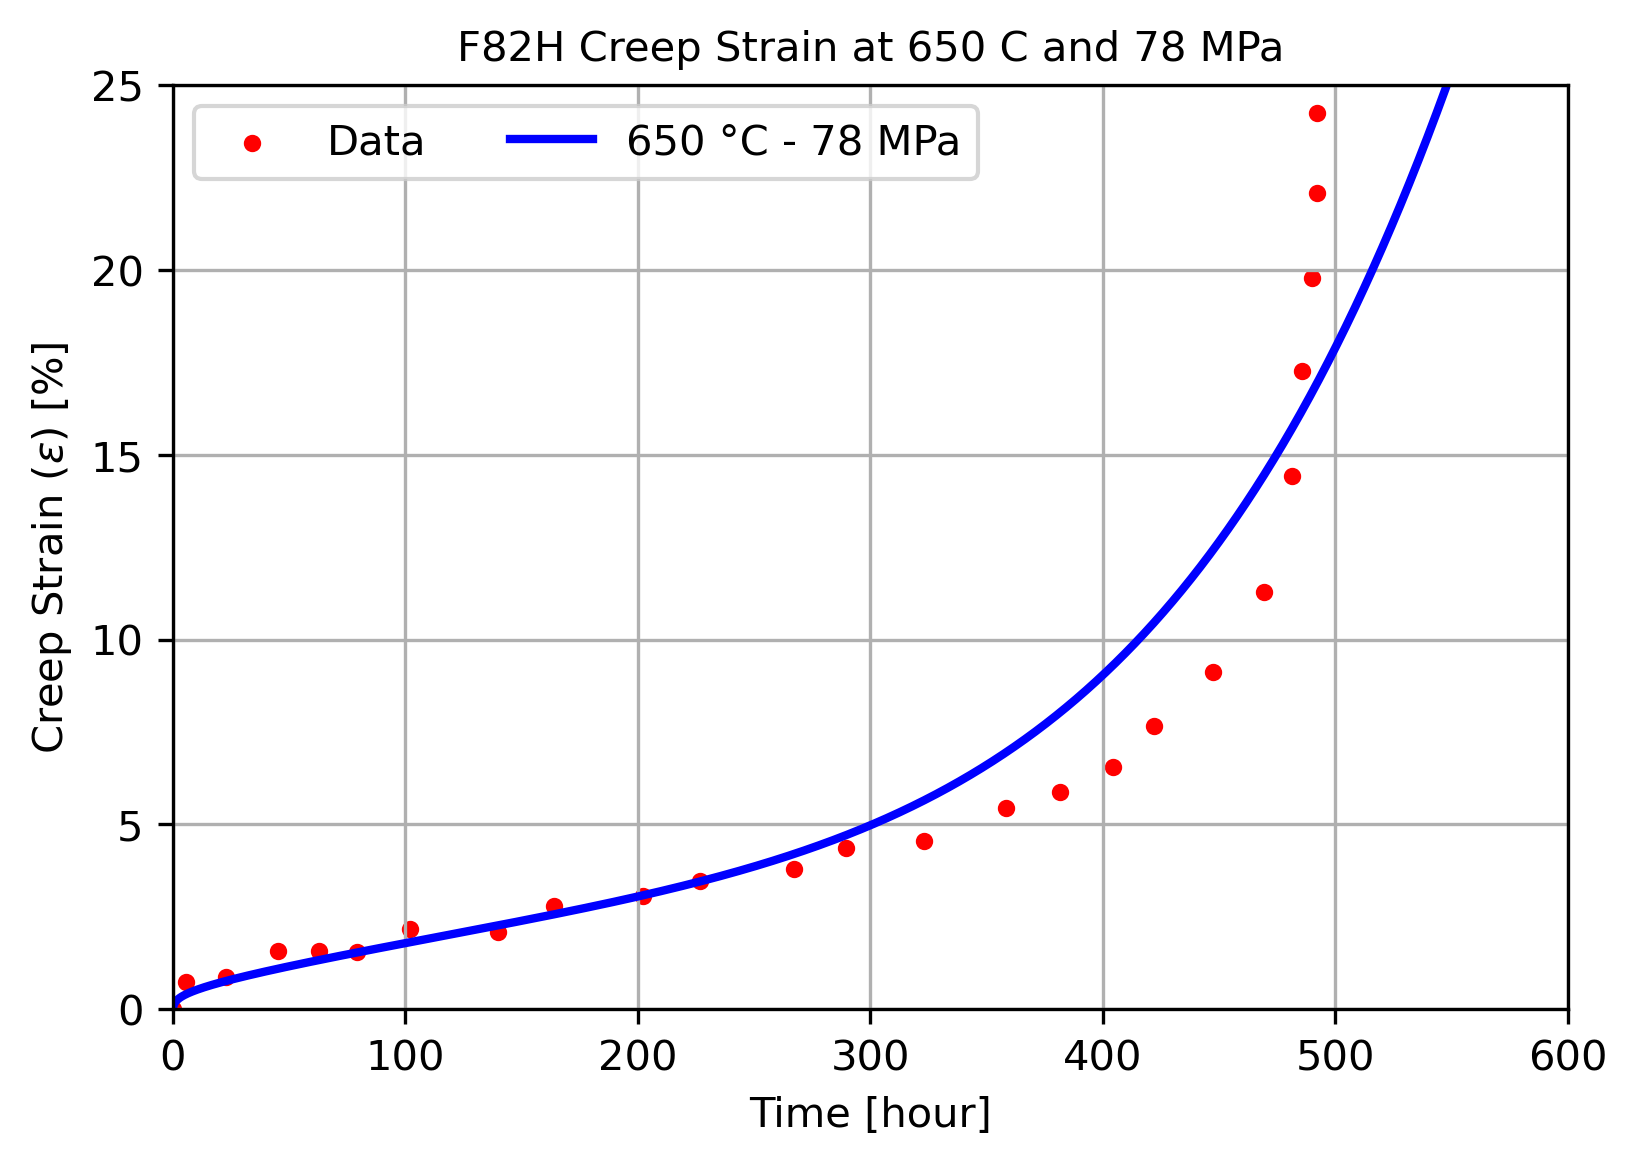

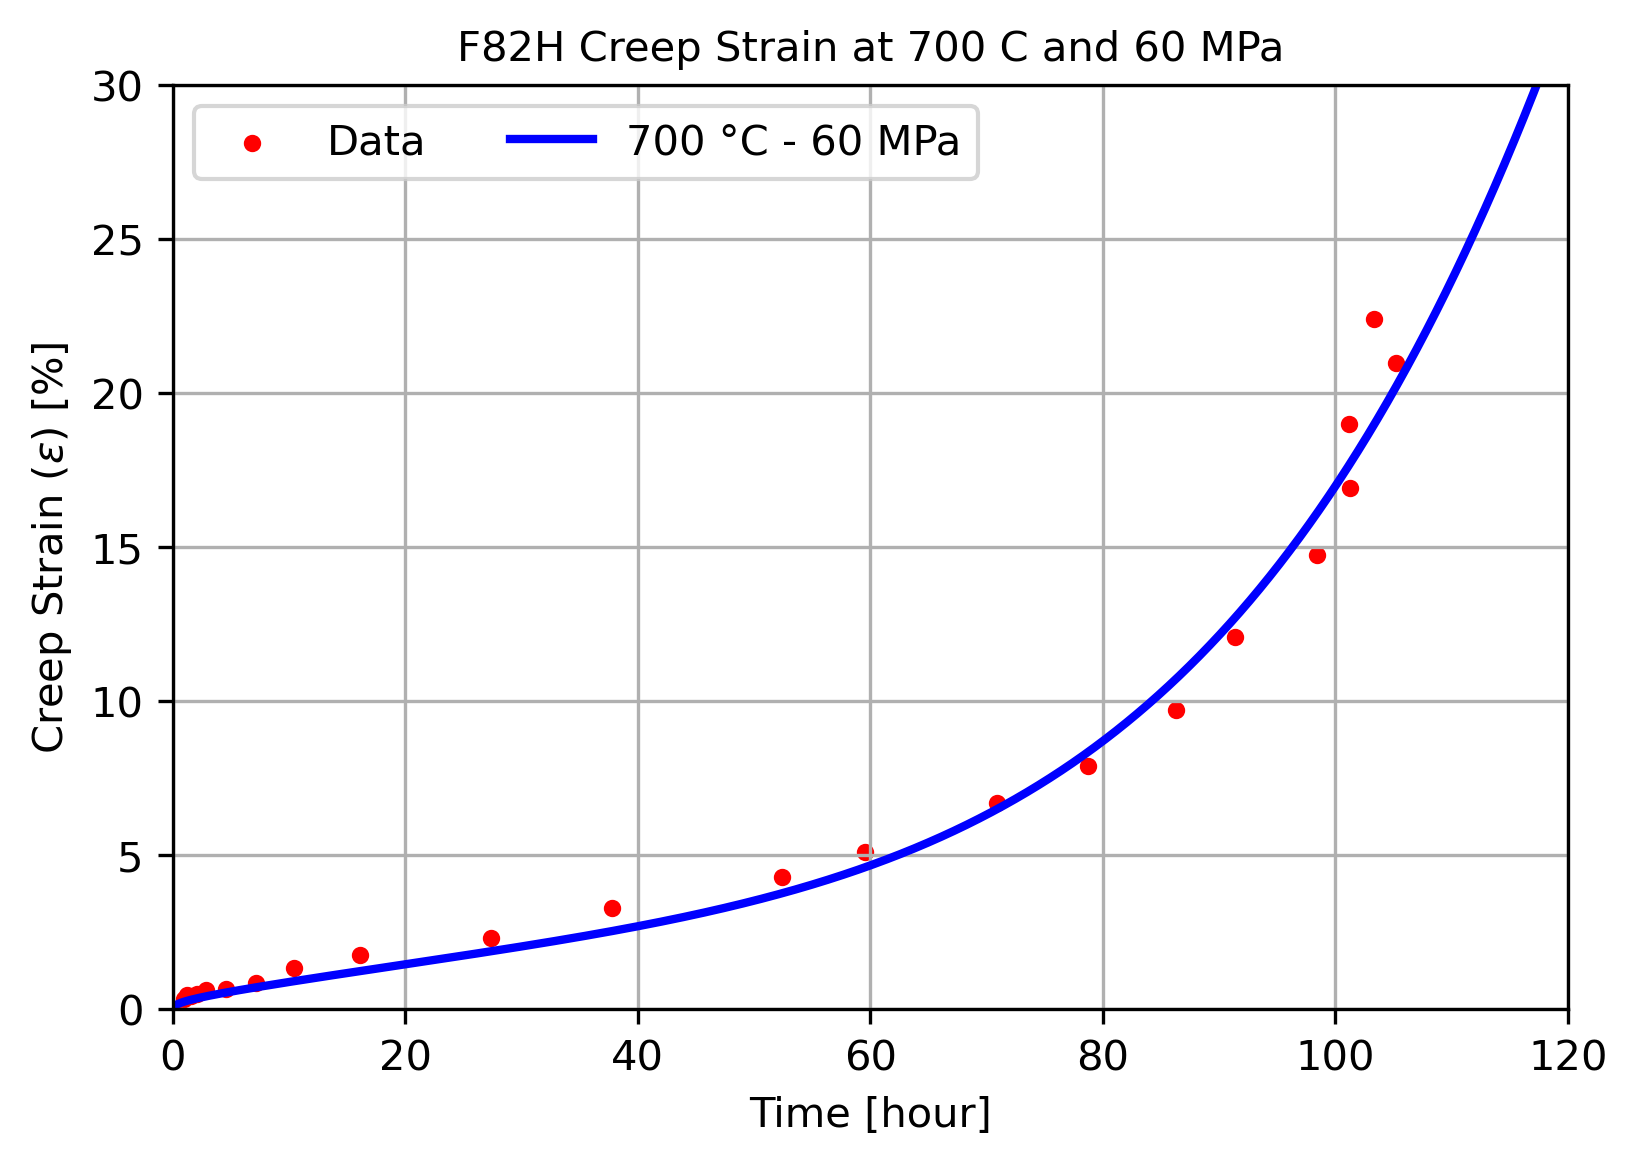

In [9]:
material_property = "F82H Creep Strain"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=35, room_temp=293, display_data_table_bool = True)

# Initialize fitting constants and functions
gamma_0 = 1.125
C_r = 26.25
A_e = -67.5
A_r = -0.02121
B_r = -0.02329
t_max = 600

get_epsdot_F82H_lambda_3 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

t_78_923, epsdot_78_923 = get_epsdot_F82H_lambda_3(78, 923)

# Assemble raw and fit data for first plot
x_data_list = [variables[0]]
y_data_list = [variables[1]]
x_fit_list = [t_78_923]
y_fit_list = [epsdot_78_923]
data_colors = ['red']
fit_colors = ['blue']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Data']
fit_labels = ['650 °C - 78 MPa']
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep Strain ($\epsilon$) [%]', title=material_property + " at 650 C and 78 MPa",\
                  scale='linear', font_size=fsize, xlim=[0, 600], ylim=[0, 25],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

gamma_0 = 1.15
A_r = -0.021
B_r = -0.0231
t_max = 120

get_epsdot_F82H_lambda_4 = lambda sig, Temp:\
    get_epsdot_F82H(sig, Temp, i_max, t_max, A_p, B_p, C_p, A_r, B_r, C_r, A_e, B_e, C_e, gamma_0, gamma_1, gamma_2, a_0, b_0, c_0)

t_60_973, epsdot_60_973 = get_epsdot_F82H_lambda_4(60, 973)

# Assemble raw and fit data for second plot
x_data_list = [variables[2]]
y_data_list = [variables[3]]
x_fit_list = [t_60_973]
y_fit_list = [epsdot_60_973]
data_colors = ['red']
fit_colors = ['blue']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['Data']
fit_labels = ['700 °C - 60 MPa']
legend_loc = 'upper left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Time [hour]', y_label=r'Creep Strain ($\epsilon$) [%]', title=material_property + " at 700 C and 60 MPa",\
                  scale='linear', font_size=fsize, xlim=[0, 120], ylim=[0, 30],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)

### 2.6. Fatigue <a name="fatigue"></a>

,log10Cycles2N_eT300,log10Strainamplitude_eT300,log10Cycles2N_pT300,log10Strainamplitude_pT300,log10Cycles2N_tT300,log10Strainamplitude_tT300,log10Cycles2N_H_T300,log10Strainamplitude_H_T300,log10Cycles2N_H_T573,log10Strainamplitude_H_T573,log10Cycles2N_H_T673,log10Strainamplitude_H_T673
0,3.287133,-0.604795,3.288915,-0.836581,3.299461,-0.408056,3.028746,-1.990191,4.042472,-2.207503,3.427042,-1.984225
1,3.601306,-0.663020,3.604400,-1.065366,3.586321,-0.514267,3.074882,-1.819519,4.121945,-2.213015,3.484627,-1.978577
2,3.896654,-0.673058,3.908606,-1.027338,3.913630,-0.480713,2.990841,-1.816800,NaN,NaN,3.677772,-2.118257
3,4.201062,-0.661270,3.909783,-1.180404,3.909655,-0.563786,3.532124,-2.084827,NaN,NaN,3.766361,-2.109783
4,4.505974,-0.715081,4.201930,-1.374102,4.209785,-0.595710,3.716574,-2.210529,NaN,NaN,4.321847,-2.293881
5,4.810516,-0.720786,4.513238,-1.659720,4.510050,-0.645128,3.868472,-2.078919,NaN,NaN,4.383856,-2.288228
6,5.410709,-0.775889,4.818015,-1.696038,4.810348,-0.698920,3.987107,-2.154333,NaN,NaN,4.648201,-2.391478
7,5.711142,-0.847174,5.424060,-2.512099,5.419869,-0.767183,4.004219,-2.207463,NaN,NaN,4.741246,-2.380203
8,NaN,NaN,5.711492,-2.692657,5.724815,-0.825368,4.636133,-2.282399,NaN,NaN,4.855672,-2.436040
9,NaN,NaN,NaN,NaN,NaN,NaN,4.480026,-2.394432,NaN,NaN,5.090219,-2.433024


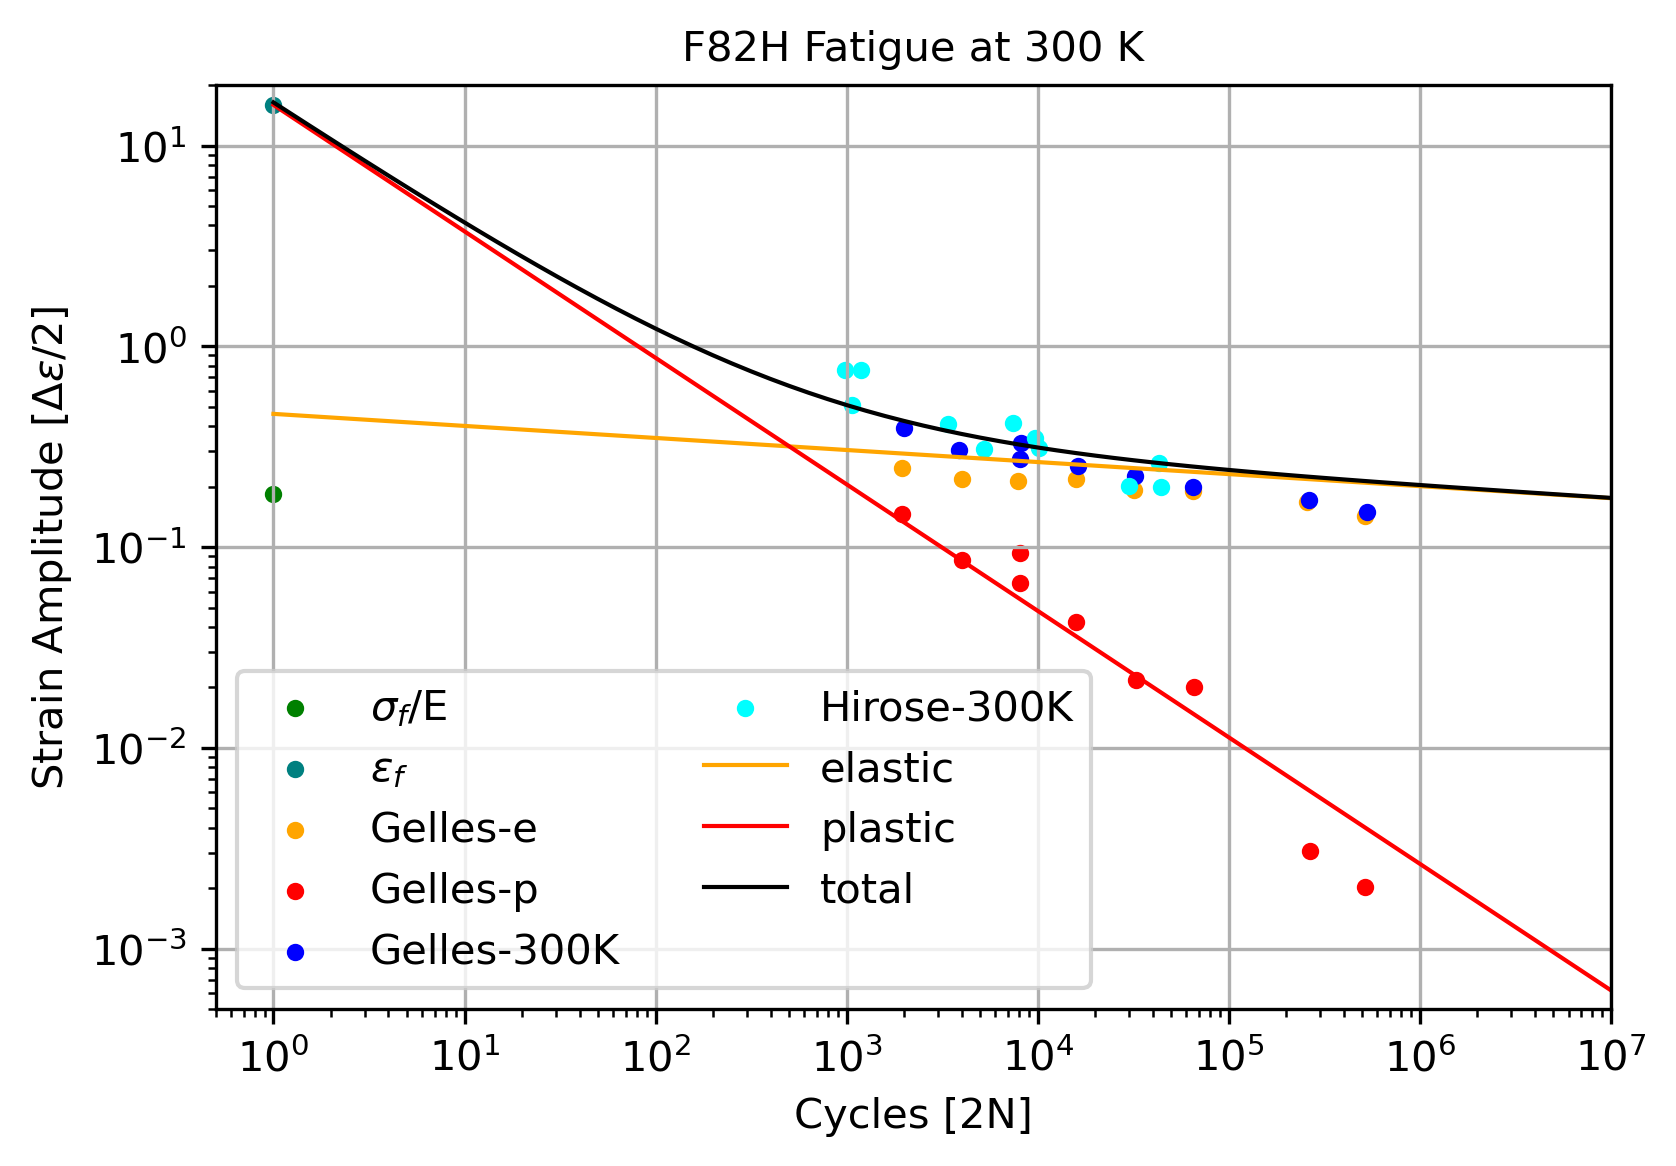

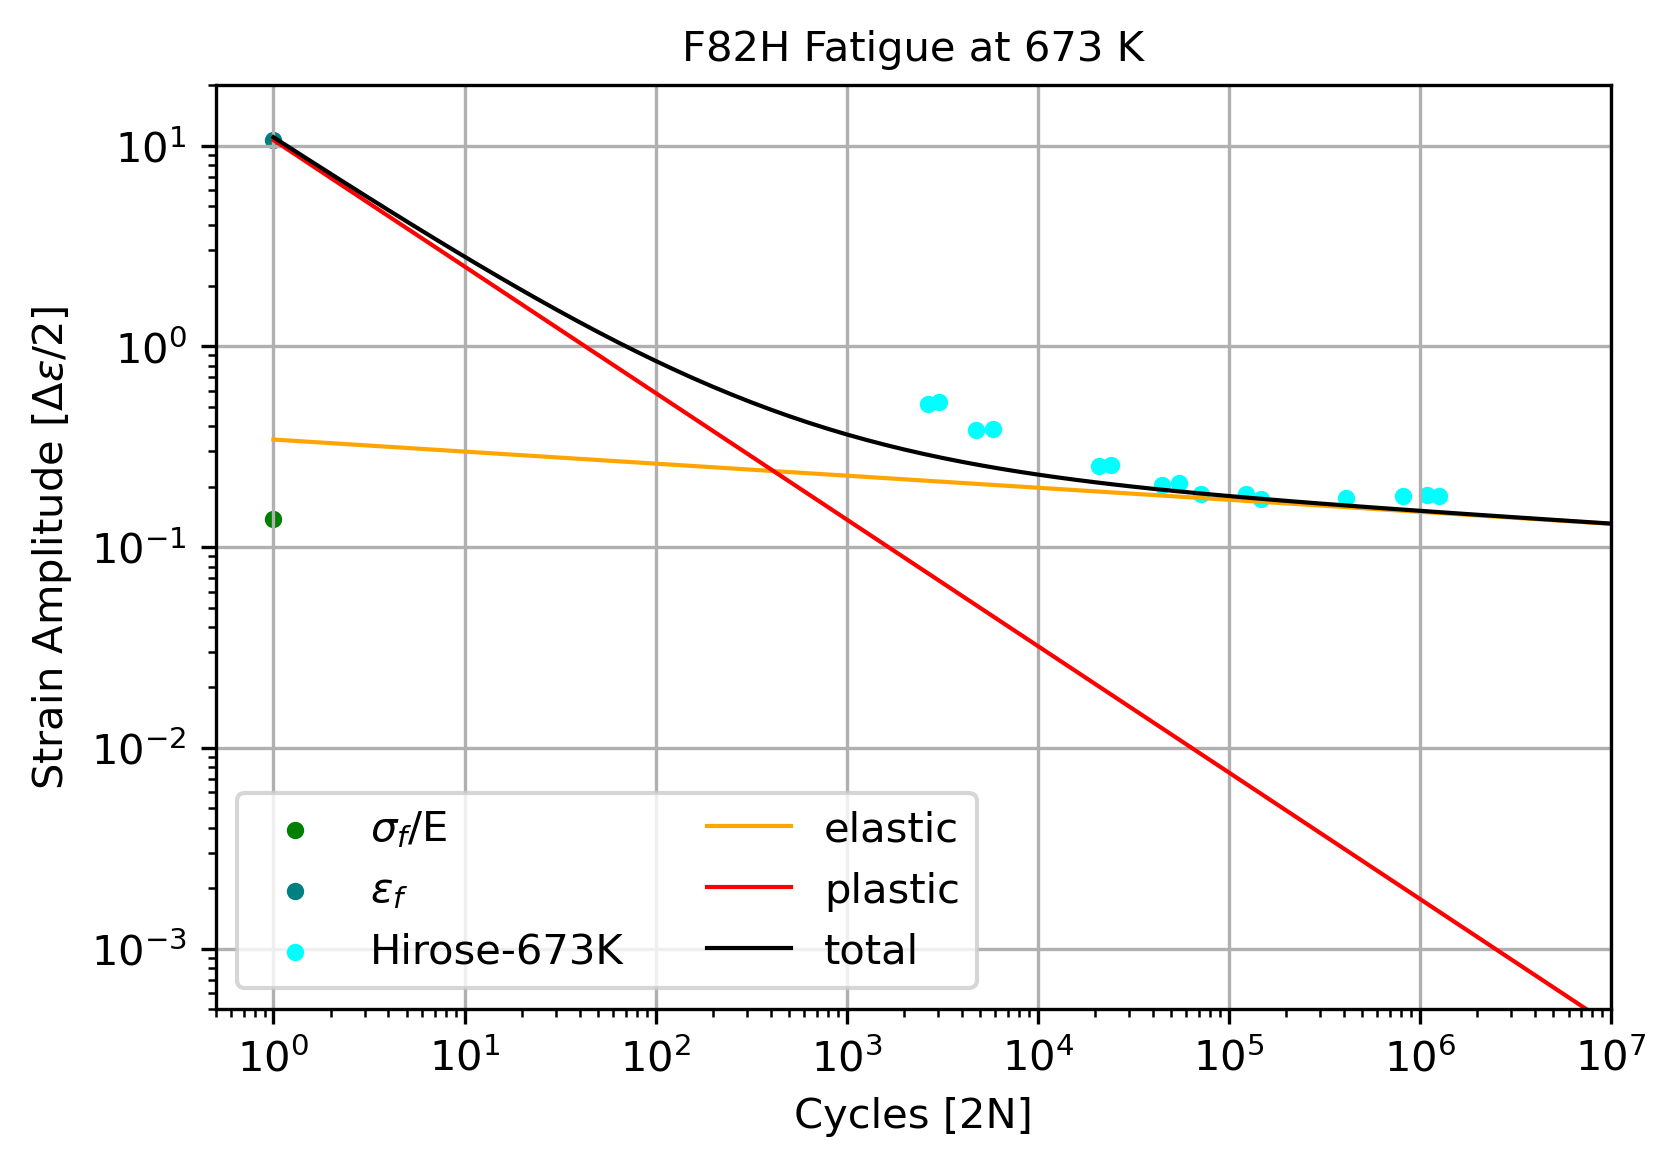

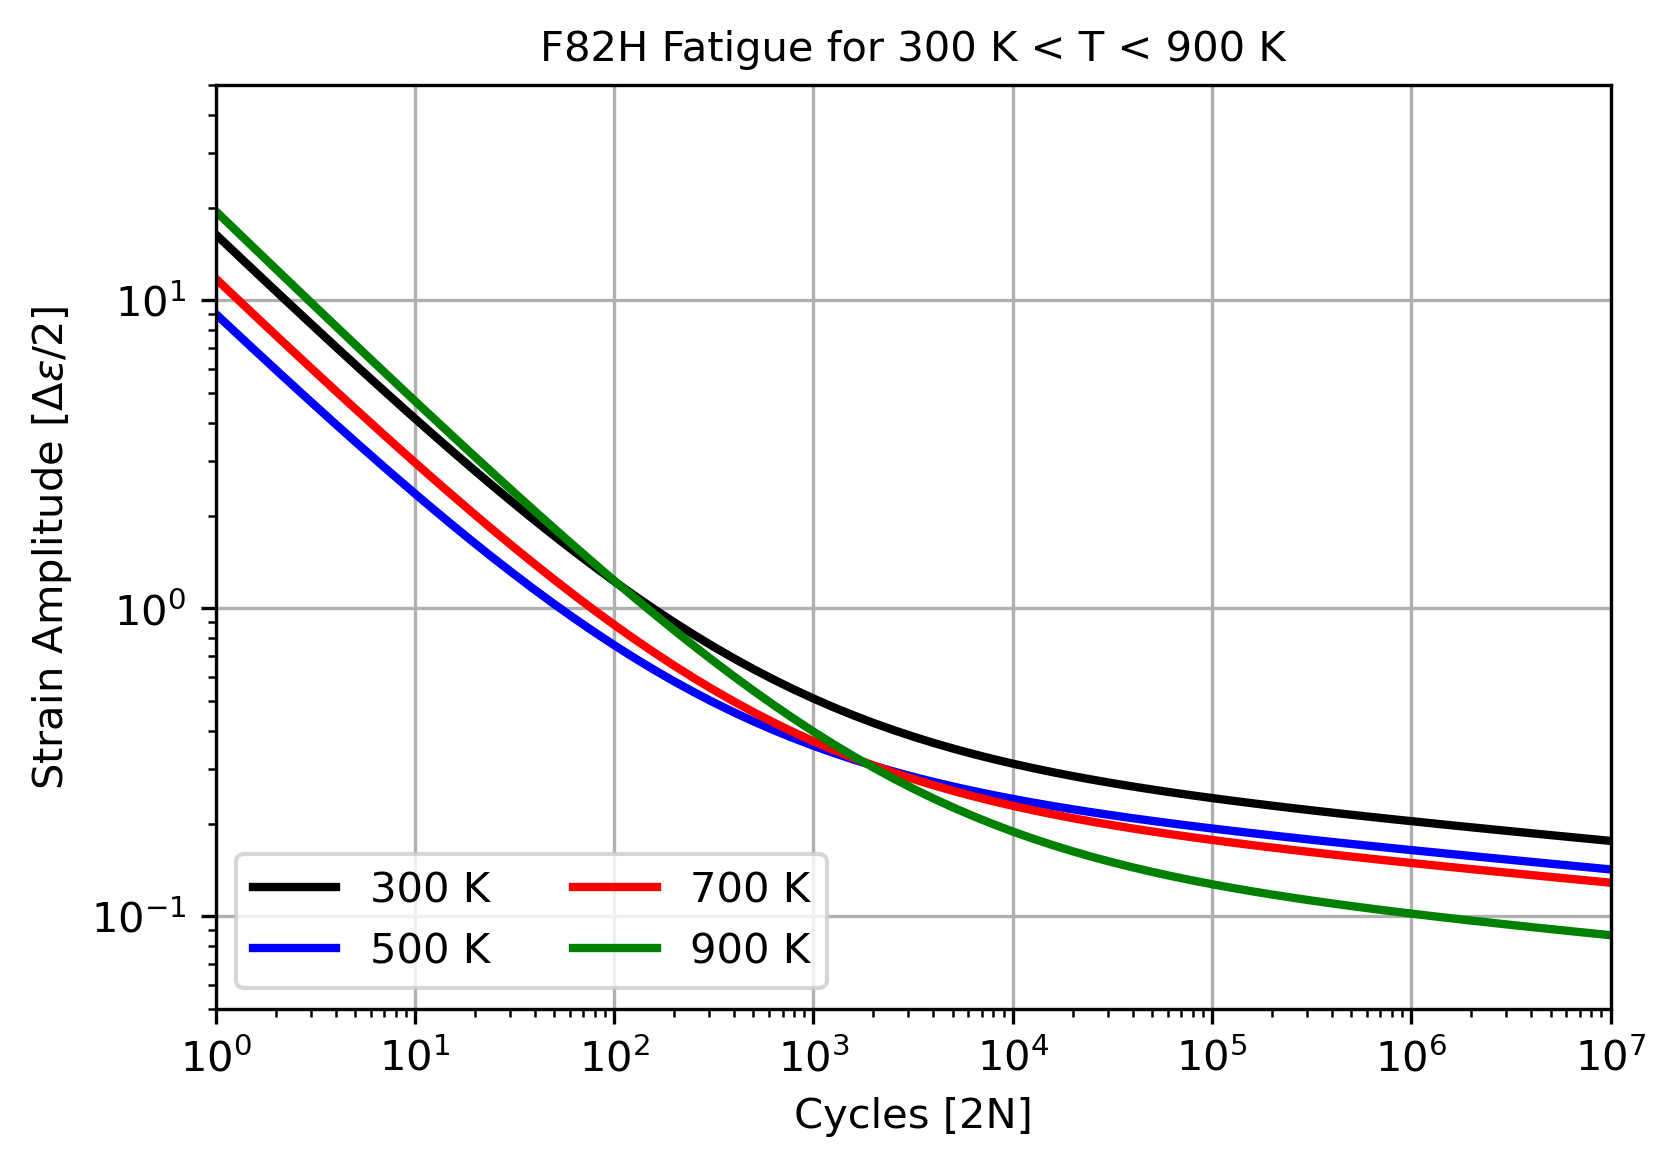

In [10]:
material_property = "Fatigue"
var_names, variables = load_data(excel_filename, material_property,\
                        header_rows_list=[2], num_data_rows=15, room_temp=293, display_data_table_bool = True)

# Initialize fitting constants and functions
E = lambda T: 4.0761e11 - 3.5521e7 * T - 5.871e3 * T**2
e_tot = lambda T: 1e-2 * (62.09 - 0.2306 * T + 0.0003032 * T**2 - 1.082e-7 * T**3)
sig_u = lambda T: 1065 - 2.468 * T + 0.004087 * T**2 - 2.575e-6 * T**3
C = lambda T: 100 * np.log(1 + e_tot(T))
B = lambda T: 2.5 * (1 + e_tot(T)) * sig_u(T) * 1e8 / E(T)
b = -0.06
c = -0.63
del_eps_e = lambda T, n: B(T) * (n)**b
del_eps_p = lambda T, n: C(T) * (n)**c
del_eps_tot = lambda T, n: del_eps_e(T, n) + del_eps_p(T, n)

n = np.arange(0, 7, 0.1)
N2 = 2 * 10**n - 1

# Assemble raw and fit data for first plot
temp = 300
vars_x = variables[::2][:4]
vars_y = variables[1::2][:4]

x_data_list = [np.power(10, x) for x in vars_x]
y_data_list = [np.power(10, y) for y in vars_y]
y_data_list[-1] = 0.5e2 * y_data_list[-1]

x_data_list = [1] + [1] + x_data_list
y_data_list = [B(temp)/2.5] + [C(temp)] + y_data_list

x_fit_list = [N2]*3
y_fit_list = [del_eps_e(temp, N2), del_eps_p(temp, N2), del_eps_tot(temp, N2)] 

data_colors = ['green', 'teal', 'orange', 'red', 'blue', 'cyan']
fit_colors = ['orange', 'red', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = [r'$\sigma_f$/E', r'$\epsilon_f$', 'Gelles-e', 'Gelles-p', 'Gelles-300K', 'Hirose-300K']
fit_labels = ['elastic', 'plastic', 'total']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 1

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Cycles [2N]', y_label=r'Strain Amplitude [$\Delta\epsilon/2$]', title="F82H " + material_property + " at 300 K",\
                  scale='log-log', font_size=fsize, xlim=[0.5, 1e7], ylim=[5e-4, 2e1],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)


# Assemble raw and fit data for second plot
temp = 673
vars_x = variables[::2][-1]
vars_y = variables[1::2][-1]

x_data_list = [np.power(10, vars_x)]
y_data_list = [np.power(10, vars_y)]
y_data_list[-1] = 0.5e2 * y_data_list[-1]

x_data_list = [1] + [1] + x_data_list
y_data_list = [B(temp)/2.5] + [C(temp)] + y_data_list

x_fit_list = [N2]*3
y_fit_list = [del_eps_e(temp, N2), del_eps_p(temp, N2), del_eps_tot(temp, N2)] 

data_colors = ['green', 'teal', 'cyan']
fit_colors = ['orange', 'red', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = [r'$\sigma_f$/E', r'$\epsilon_f$', 'Hirose-673K']
fit_labels = ['elastic', 'plastic', 'total']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 1

custom_multi_plot(x_data_list, y_data_list, x_fit_list=x_fit_list, y_fit_list=y_fit_list,\
                  x_label='Cycles [2N]', y_label=r'Strain Amplitude [$\Delta\epsilon/2$]', title="F82H " + material_property + " at 673 K",\
                  scale='log-log', font_size=fsize, xlim=[0.5, 1e7], ylim=[5e-4, 2e1],\
                  grid=True, legend=True, data_labels=data_labels, fit_labels=fit_labels,\
                  data_colors=data_colors, fit_colors=fit_colors, data_marker_sizes=data_marker_sizes,\
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)


# Assemble raw and fit data for third plot
x_fit_list = [N2]*4
y_fit_list = [del_eps_tot(300, N2), del_eps_tot(500, N2), del_eps_tot(700, N2), del_eps_tot(900, N2)] 

fit_colors = ['black', 'blue', 'red', 'green']
fit_labels = ['300 K', '500 K', '700 K', '900 K']
legend_loc = 'lower left'
legend_num_cols = 2
fit_line_width = 2

custom_multi_plot(x_data_list=None, y_data_list=None, x_fit_list=x_fit_list, y_fit_list=y_fit_list ,\
                  x_label='Cycles [2N]', y_label=r'Strain Amplitude [$\Delta\epsilon/2$]', title="F82H " + material_property + " for 300 K < T < 900 K",\
                  scale='log-log', font_size=fsize, xlim=[1, 1e7], ylim=[5e-2, 5e1],\
                  grid=True, legend=True, data_labels=None, fit_labels=fit_labels,\
                  data_colors=None, fit_colors=fit_colors, data_marker_sizes=None,\
                  fit_line_widths=[fit_line_width]*len(x_fit_list), x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc=legend_loc, legend_num_cols=legend_num_cols)